# Exploratory Data Analysis (EDA) with Hypothesis Testing
** **
### *Including:*
** **

 - **Univariate Analysis:**
   - **Categoricl:** 
     - **Plots:** barh / squarify (TreeMap)
   - **Scalar:** 
     - **Plots:** stripplot / boxplot / hist / displot
     - **Distribution metrics:** Skewness & Kurtosis
     - **Normality Tests:** Shapiro-Wilk / D'Agostino's K^2 / Anderson-Darling
   - **Time-Series:** 
     - **Trend-Stationary Tests:** Augmented Dickey-Fuller Unit Root Test / Kwiatkowski-Phillips-Schmidt-Shin Test
** **
 - **Bivariate Analysis:**
   - **Categorical - Scalar:**
     - **Plots:** squarify (TreeMap) / boxplot / displot
     - **Hypothesis Tests:** ANOVA + Tukey_HSD / Kruskal-Wallis H
   - **Scalar - Scalar:**
     - **Plots:** displot / regplot / scatterplot / jointplot / pairplot / heatmap
     - **Hypothesis Tests:** 
       - **Non-Paired Samples:** Mann-Whitney U / Spearman's Rank Correlation / Student’s t-test / Pearson's Correlation
       - **Paired Samples:** Wilcoxon Signed-Rank / Paired Student’s t-test
       - **Ordinal Samples:** Kendall's Rank Correlation
       - **Categorical Samples:** Chi-Squared
   - **TimeSeries - Scalar:**
     - **Plot:** lineplot
   - **Categorical - Categorical:**
     - **Plots:** bar / countplot
** **       
 - **Trivariate Analysis:**
   - **Categorical-Categorical - Scalar:**
     - **Plots:** boxplot / barplot / displot / 
   - **Scalar-Scalar - Categorical:**
     - **Plots:** scatterplot / implot
   - **TimeSeries - Scalar - Categorical:**
     - **Plots:** lineplot
   - **Scalar-Scalar-Scalar: ( 3 & more Scalars )**
     - **Plots:** displot / heatmap / pairplot
     - **Hypothesis Tests:** 
       - **Non-Paired Samples:** Kruskal-Wallis H / ANOVA + Tukey_HSD
       - **Paired Samples:** Friedman Test
       - **Ordinal Samples:** Kendall's Rank Correlation
       - **Categorical Samples:** Chi-Squared
** **       
 - **Multivariate Analysis:**  
   - **Scalar-Scalar - Categorical-Categorical:**
     - **Plots:** lmplot
   - **Scalar-Scalar - Categorical-Categorical-Categorical:**
     - **Plots:** lmplot
   - **Scalar-Scalar-Scalar-Scalar-...-Scalar:**
     - similar to Trivariate Analysis (Scalar-Scalar-Scalar)

##### 
# Business Question
 - How is the estimated-column affected by other columns?

# Loading Libraries

In [1]:
# importing required modules

import re  # text editing
import statistics as stat

import numpy as np
import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

#####   
# Loading and Exploring the Data

In [2]:
# (input) importing Raw data

data_set_name    = 'Marketing'
estimated_column = 'Complain'

data_file  = 'Marketing_Raw.csv'
data_sheet = 'Marketing_Raw'

# (auto)
df_raw = pd.read_csv( data_file, header=0 ) # , delimiter=','
print(f'there are {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.')

df_raw.tail() 

there are 2240 rows and 22 columns.


Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1    7/3/2013       99       372         18              126   
2236         0   1/22/2013       99         5         10               13   
2237         0   3/12/2012       99       185          2               88   
2238         0  11/29/2012       99       267         38              701   
2239         2    1/9/2012       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  
2235                  4         0         0  
2236                  8         0         0  
2237                  8         0         0  
2238                  3         0         0  
2239                  7         1         0

#####   

In [3]:
# (auto) Observing Random Records
np.random.seed(3)
cm = sns.light_palette("cyan", as_cmap=True)

df_raw.sample(n=200).style.\
    background_gradient(subset=['Year_Birth', 'MntWines'], cmap=cm).\
    bar(subset=['Income', 'Recency'], color='deeppink').\
    highlight_null(color="lime").\
    format(precision=3).\
    hide(axis="index")       #.to_excel('styled.xlsx', engine='openpyxl')

#####   
# Preparing Data (Phase1) 
including:
 - fixing columns header
 - deleting unnecessary columns ( eg. 'ID' )
 - reindexing

In [4]:
# help
df_raw.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [5]:
# fixing features names

df_raw.columns = [
       'Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'
       ]
df_raw.head(3) 

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   6/16/2014        0       189        104              379              111   
1   6/15/2014        0       464          5               64                7   
2   5/13/2014        0       134         11               59               15   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   

   Complain  
0         0  
1         0  
2         0

#####   

In [6]:
# deleting unnecessary columns (eg. ID)

del_columns = ['Id']   # ['col1','col5',col7]


# (auto)
df_raw.drop(del_columns,axis=1,inplace=True)
df_raw.tail(3)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2237        1976  Graduation       Divorced  46310.0        1         0   
2238        1978  Graduation        Married  65819.0        0         0   
2239        1969         PhD        Married  94871.0        0         2   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2237   3/12/2012       99       185          2               88   
2238  11/29/2012       99       267         38              701   
2239    1/9/2012       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  
2237                  8         0         0  
2238                  3         0         0  
2239                  7         1         0

#
# Info 

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

#
# Count of Data Types

In [8]:
df_raw.dtypes.value_counts()

int64      17
object      3
float64     1
Name: count, dtype: int64

#
# Checking Missing Values

In [9]:
# Checking Missing Values
def Missing_Check( df ):
    total   = ( df.isnull().sum()               ).sort_values(ascending=False)
    percent = ( df.isnull().sum() / df.shape[0] ).sort_values(ascending=False)
    missing_data = pd.concat( [total,percent], axis=1, keys=['Total','Percent'] )
    return missing_data
    
Missing_Check( df_raw )

Total   Percent
Income                  24  0.010714
Year_Birth               0  0.000000
MntFishProducts          0  0.000000
Response                 0  0.000000
NumWebVisitsMonth        0  0.000000
NumStorePurchases        0  0.000000
NumCatalogPurchases      0  0.000000
NumWebPurchases          0  0.000000
NumDealsPurchases        0  0.000000
MntGoldProds             0  0.000000
MntSweetProducts         0  0.000000
MntMeatProducts          0  0.000000
Education                0  0.000000
MntFruits                0  0.000000
MntWines                 0  0.000000
Recency                  0  0.000000
Dt_Customer              0  0.000000
Teenhome                 0  0.000000
Kidhome                  0  0.000000
Marital_Status           0  0.000000
Complain                 0  0.000000

#
# Univariate Analysis
## Object Columns

In [10]:
# (auto) finding object columns 
obj_cols = df_raw.columns[ df_raw.dtypes=='object' ]; print('\nobj_cols',obj_cols,'\n\nSize =', len(obj_cols))


obj_cols Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object') 

Size = 3


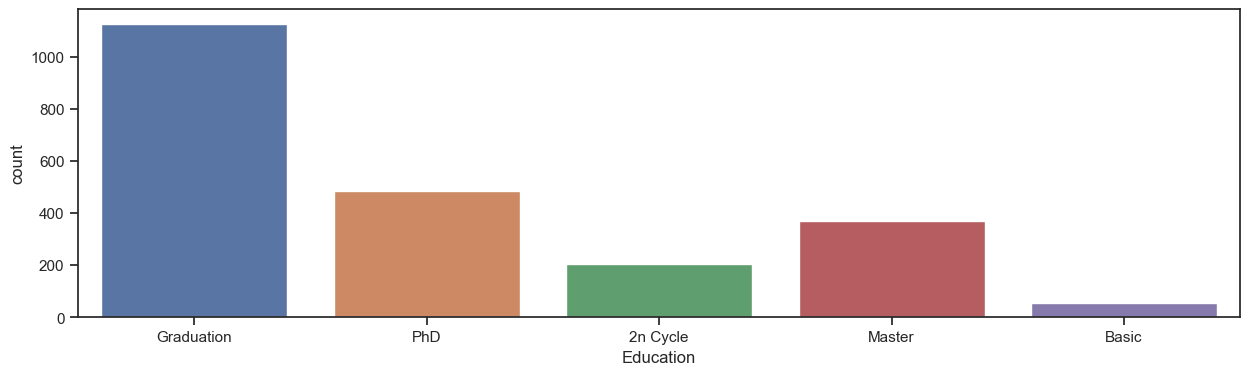

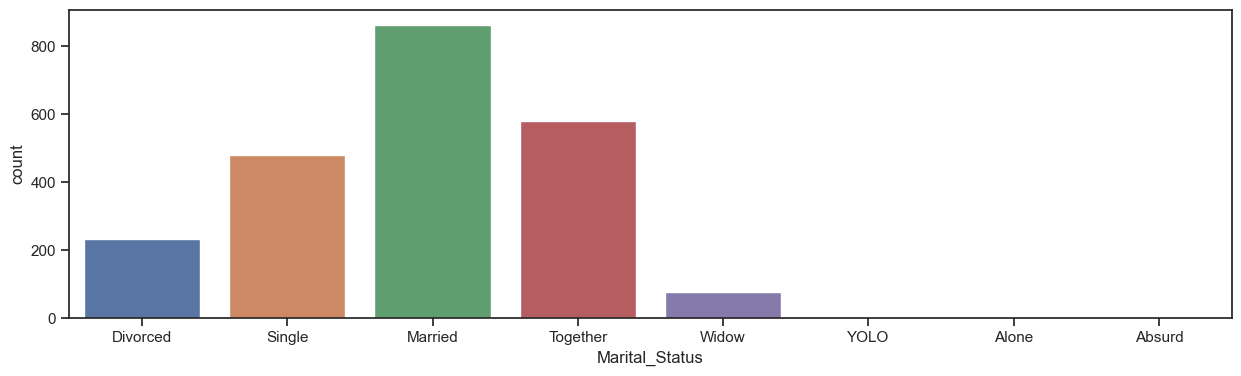

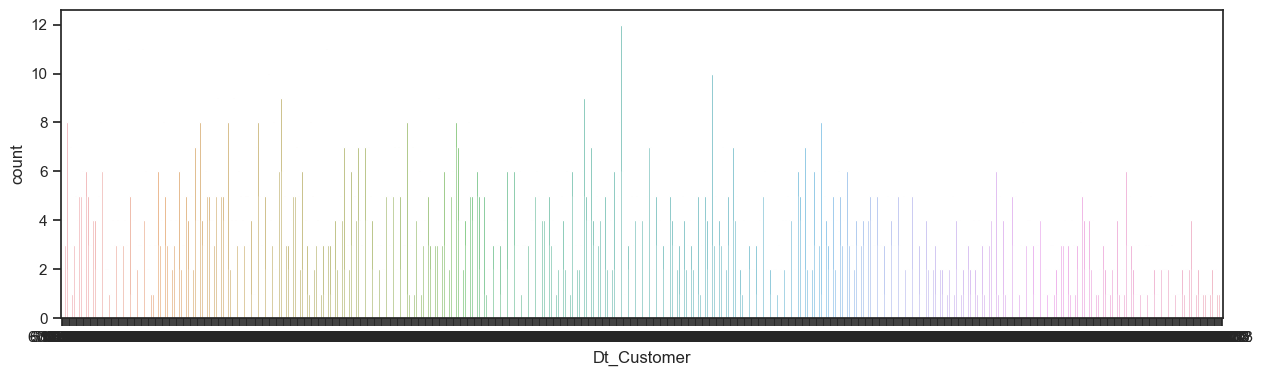

In [11]:
# Observing sub-cats of object columns
for col in obj_cols:
    fig_dims = (15, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=col, ax=ax,data=df_raw)
    plt.show()

col_0           count
Marital_Status       
Married           864
Together          580
Single            480
Divorced          232
Widow              77
Alone               3
Absurd              2
YOLO                2


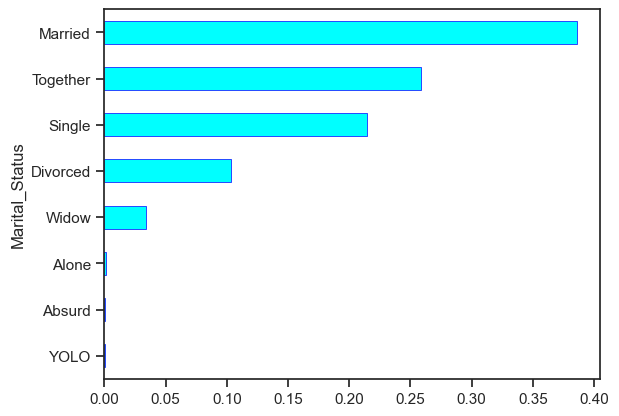

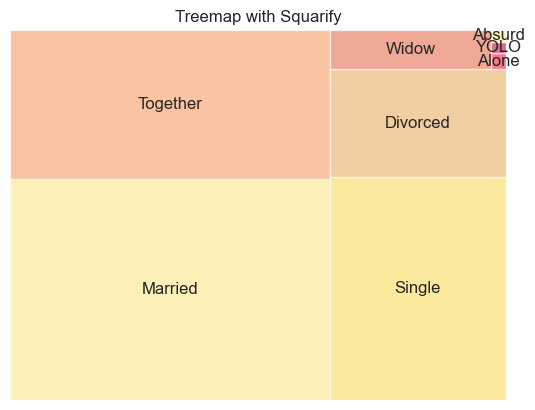

#NaN = 0 

   Total  Percent
0    0.0      0.0 

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Marital_Status
Non-Null Count  Dtype 
--------------  ----- 
2240 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB
None


In [12]:
# (manual) cat --- choose category to be plotted

cat = 'Marital_Status'   # 'Education', 'Marital_Status', 'Dt_Customer'


# (auto)
# Frequency Table  
freq_tab = pd.crosstab( index=df_raw[cat].astype('str'), columns='count' )
print(freq_tab.sort_values('count',ascending=False))

# Barh
L = df_raw[cat].astype('str')
L.value_counts(normalize=True).sort_values().plot.barh(linewidth=.5, edgecolor='blue', facecolor='cyan'); plt.show()

# TreeMap
import squarify   #pip install squarify
TreeMap_Series = L.value_counts(normalize=True)
label  = TreeMap_Series.index
sizes  = list( TreeMap_Series )
colors = ['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
plt.axis('off'); plt.show()

# Report of nan values
print( '#NaN =', L.isna().sum().item(), '\n' )

Total        = L.isnull().sum()               
Percent      = Total / df_raw.shape[0]  
missing_data = pd.DataFrame( [Total,Percent] ).T
missing_data.columns = ['Total','Percent']
print( missing_data, '\n' )

print( L.info() )

#####   

#
# Univariate Analysis
## Scalar Columns

In [13]:
# (auto) finding scalar columns 
sclrs = df_raw.columns[ df_raw.dtypes!='object' ]
print('\nsclr_cols =',list(sclrs),'\n\nSize =', len(sclrs))

# Check the Data.describe()
df_raw.describe().T.style.format(precision=1)   


sclr_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'] 

Size = 18


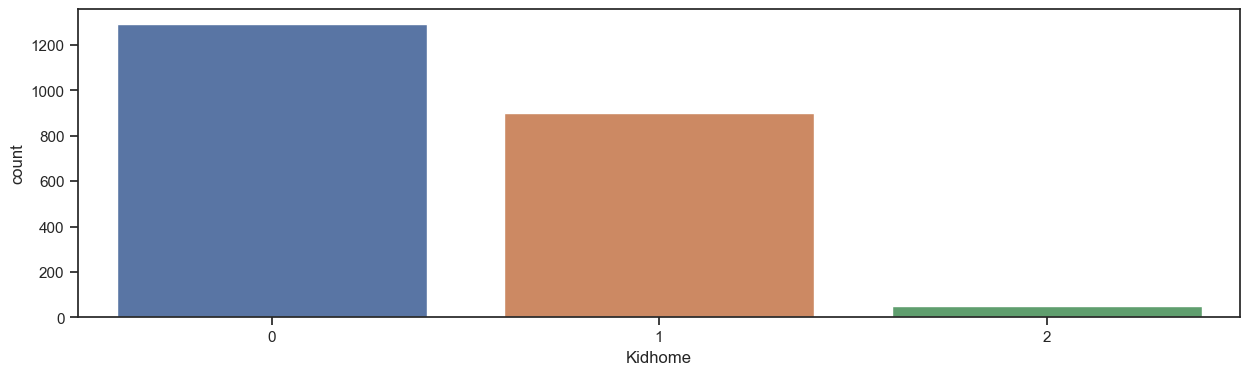

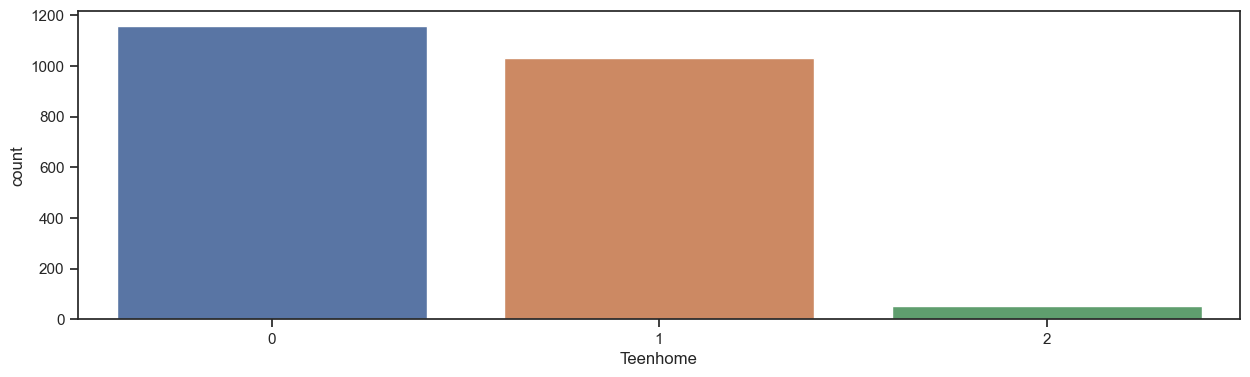

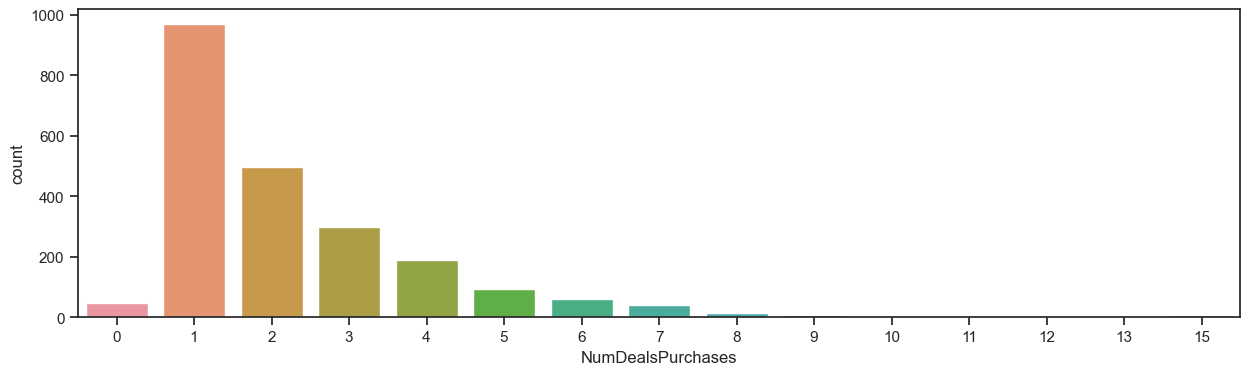

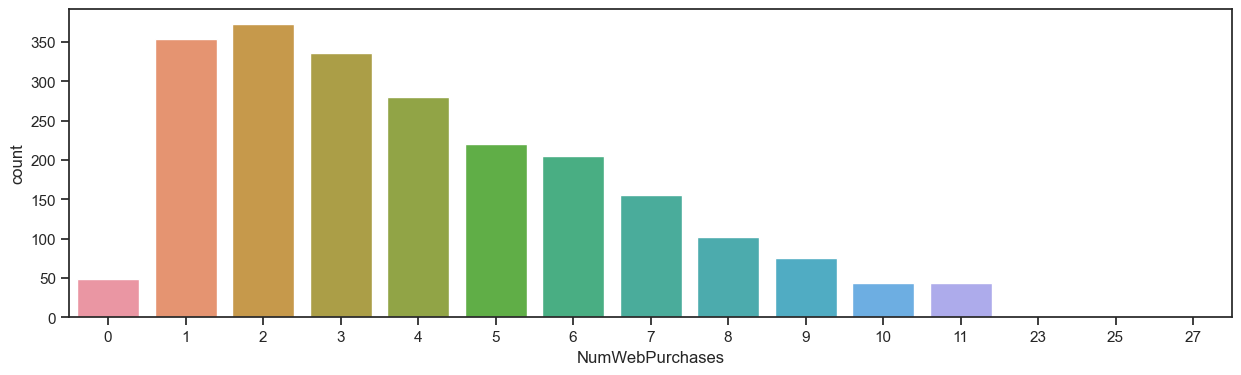

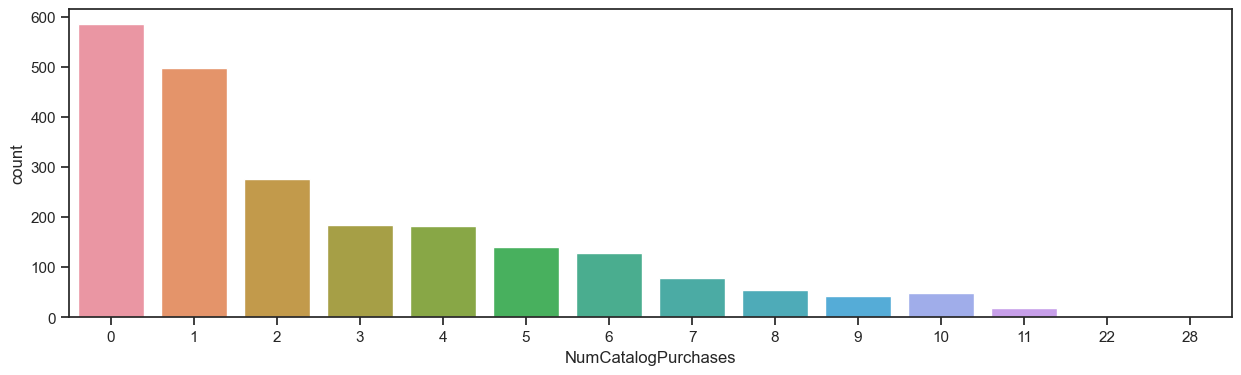

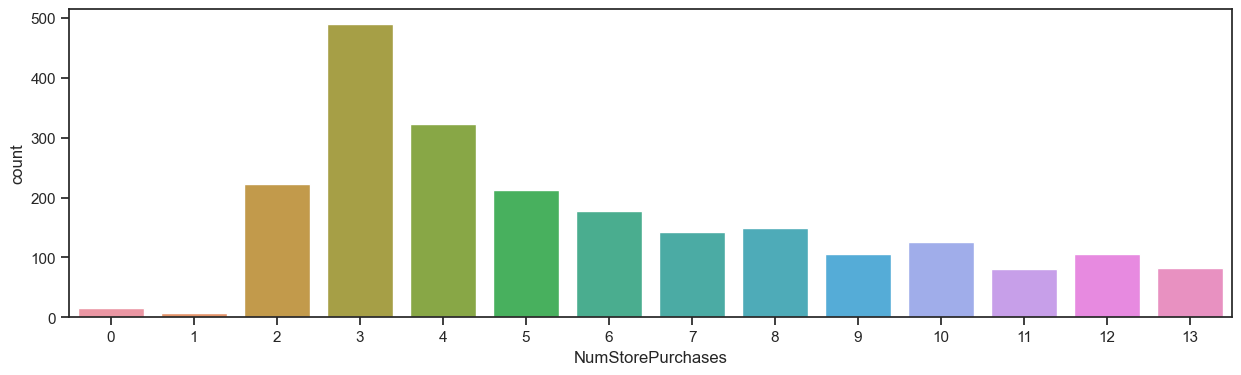

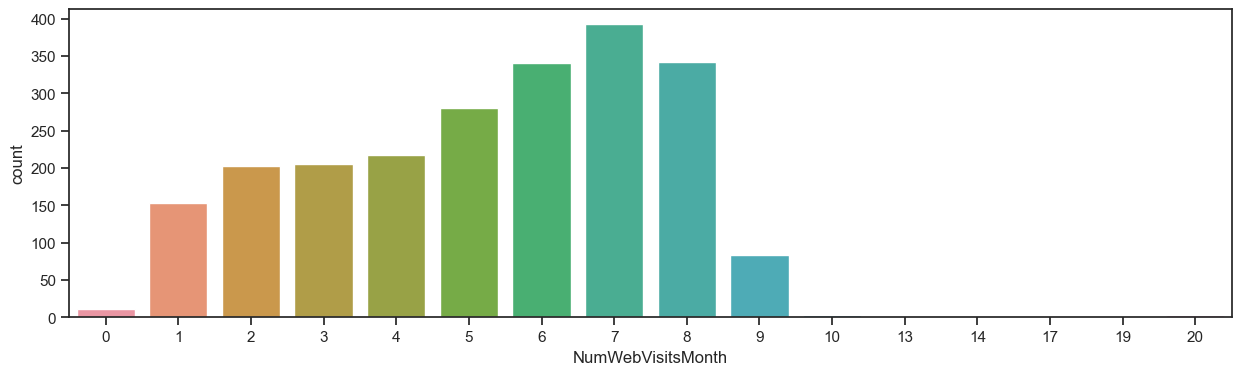

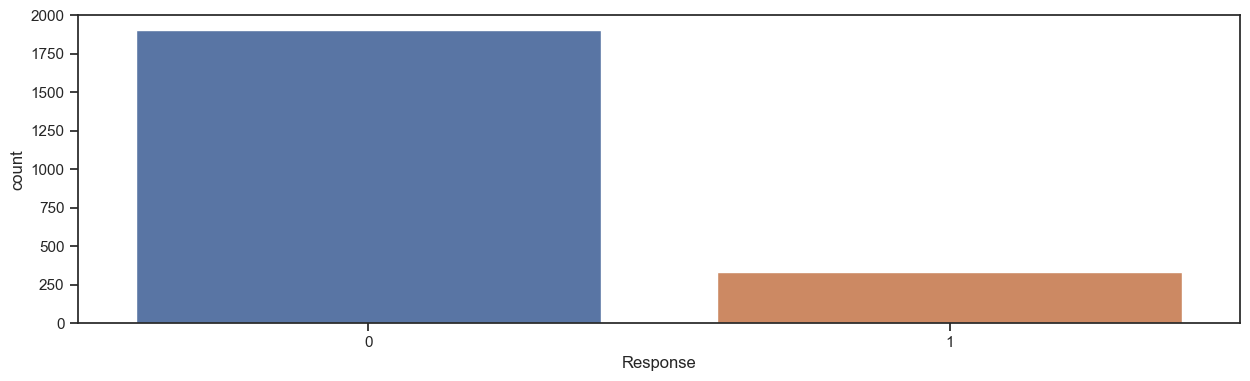

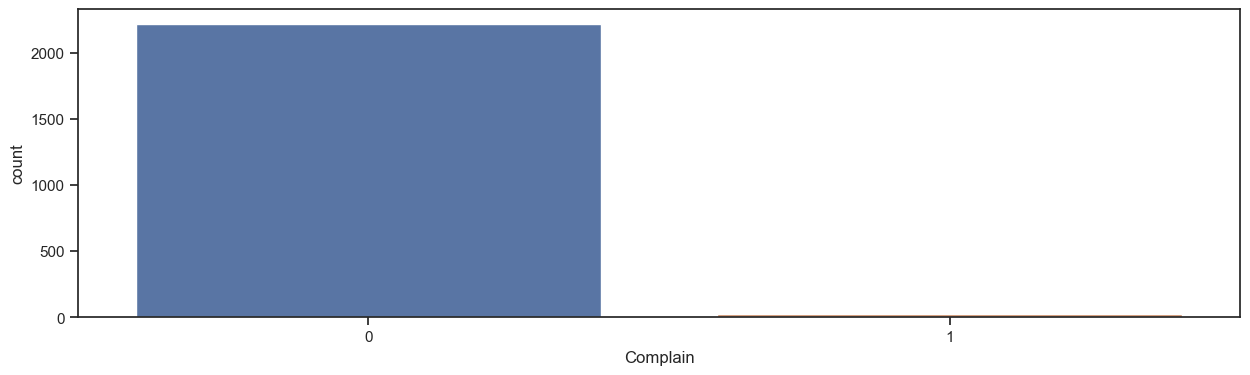

In [14]:
# Observing content count of scalar columns
for ft in sclrs:
    if df_raw[ft].nunique() <= 50:
        fig_dims = (15, 4)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=ft, ax=ax,data=df_raw)
        plt.show()

#NaN = 0
count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


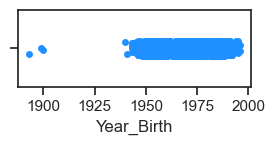

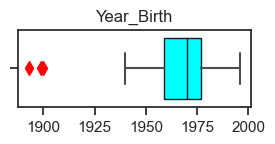

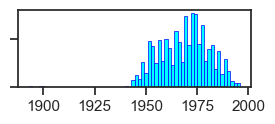

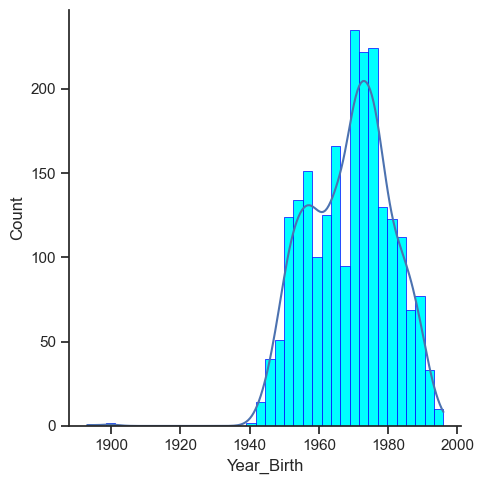


Skewness (Degree of Assymetry Around The Mean) = -0.3
Negative Skewness:  Mean<Median<Mode  (Left-Tail)

Kurtosis (Degree of Thickness of Tails) = 0.7
LeptoKurtic Distribution:  Relatively-Peaked  with  Many-Outliers (Heavy-Tails)


Shapiro-Wilk Normality Test:
stat=0.976, p=0.000
Probably not Gaussian

D'Agostino's K^2 Normality Test:
stat=72.169, p=0.000
Probably not Gaussian

Anderson-Darling Normality Test
stat=8.759
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [15]:
# (manual) scalar --- choose scalar to be plotted

sclr = 'Year_Birth'     # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                        # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                        # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                        # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'

            
# (auto)            
# Univariate Analysis
L = df_raw[sclr].copy()
#L.value_counts(normalize=True).plot.barh(); plt.show()
print( '#NaN =', L.isna().sum().item() )
print( L.describe() )

# strip-plot
plt.figure(  figsize=(3,1)  )
sns.stripplot( data=df_raw, x=sclr, color='dodgerblue' ); plt.show()

# BoxPlot
boxprops    = dict( edgecolor = 'k', facecolor  = 'cyan', linewidth = 1 )
medianprops = dict( color     = 'k', linewidth  = 1  )
flierprops  = dict( marker    = 'd', markersize = 7, markerfacecolor = 'red', markeredgecolor = 'red' ) 
                  
plt.figure(  figsize=(3,1)  )
sns.boxplot( x=L
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
plt.title(sclr)
plt.xlabel('') 
plt.show()


# Histogram:
fig, ax = plt.subplots( figsize=(3,1) )
ax.hist ( L, bins=64, linewidth=.5, edgecolor='blue', facecolor='cyan' )
ax.set_yticklabels([]) 
plt.show()

# displot:
sns.displot(data=df_raw, x=sclr, kde=True, linewidth=.5, edgecolor='blue', facecolor='cyan'); plt.show()



##
## Skewness & Kurtosis
##

# Skewness
Skewness = np.round(L.skew(),1)
Skewness_Type      = None
Skewness_interpret = None
if   Skewness >0:
    Skewness_Type, Skewness_interpret = 'Positive', 'Mode<Median<Mean  (Right-Tail)'
elif Skewness==0:
    Skewness_Type, Skewness_interpret = 'Zero'    , 'Mean=Median=Mode  (Equal Tails)'
elif Skewness <0:
    Skewness_Type, Skewness_interpret = 'Negative', 'Mean<Median<Mode  (Left-Tail)'
print( '\nSkewness (Degree of Assymetry Around The Mean) =', Skewness )
print( Skewness_Type, 'Skewness: ', Skewness_interpret )


# Kurtosis
Kurtosis          = np.round(L.kurt(),1)
Krtosis_Type      = None
Krtosis_interpret = None
if   Kurtosis >0:
    Krtosis_Type, Krtosis_interpret = 'LeptoKurtic', 'Relatively-Peaked  with  Many-Outliers (Heavy-Tails)'
elif Kurtosis==0:
    Krtosis_Type, Krtosis_interpret = 'MesoKurtic' , '(Normal)'
elif Kurtosis <0:
    Krtosis_Type, Krtosis_interpret = 'PlatyKurtic', 'Relatively-Flat  with  Few-Outliers (Flat-Tails)  Desirable-Curve!!'
print( '\nKurtosis (Degree of Thickness of Tails) =', Kurtosis )
print( Krtosis_Type, 'Distribution: ', Krtosis_interpret )



##
## Normality Tests
##
df = df_raw.dropna()

# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
print('\n\nShapiro-Wilk Normality Test:')
np.random.seed(3); 
df = df.sample(n=min(5000,df.shape[0])) 
stat, p = shapiro(df[sclr])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably Gaussian')
else: print('Probably not Gaussian')
    
# D'Agostino's K^2 Normality Test
from scipy.stats import normaltest 
print("\nD'Agostino's K^2 Normality Test:")
stat, p = normaltest(df[sclr])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably Gaussian')
else: print('Probably not Gaussian')
    
# Anderson-Darling Normality Test
from scipy.stats import anderson 
print("\nAnderson-Darling Normality Test")
result = anderson(df[sclr])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv: print('Probably Gaussian at the %.1f%% level' % (sl))
    else: print('Probably not Gaussian at the %.1f%% level' % (sl))

#####   

#NaN = 0 

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64 



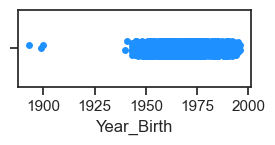

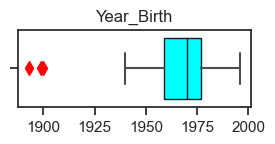

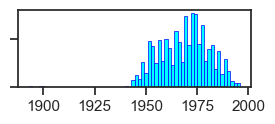

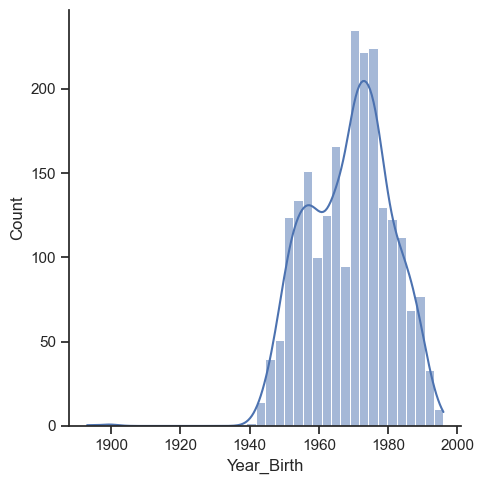


Skewness (Degree of Assymetry Around The Mean) = -0.3
Negative Skewness:  Mean<Median<Mode  (Left-Tail)

Kurtosis (Degree of Thickness of Tails) = 0.7
LeptoKurtic Distribution:  Relatively-Peaked  with  Many-Outliers (Heavy-Tails)


Augmented Dickey-Fuller Unit Root Test
stat=-19.121, p=0.000
Time-Series is "Trend-Stationary"   (mean & variance  remain constant  over time)

Kwiatkowski-Phillips-Schmidt-Shin Test
stat=0.154, p=0.100
Time-Series is "Trend-Stationary"   (mean & variance  remain constant  over time)


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [16]:
# Time-Series Scalar
sclr_time = 'Year_Birth'


# Univariate Analysis
L = df_raw[sclr_time].copy()
#L.value_counts(normalize=True).plot.barh(); plt.show()
print( '#NaN =', L.isna().sum().item(),'\n' )
print( L.describe(),'\n' )

# strip-plot
plt.figure(  figsize=(3,1)  )
sns.stripplot( data=df_raw, x=sclr_time, color='dodgerblue' ); plt.show()

# BoxPlot
boxprops    = dict( edgecolor = 'k', facecolor  = 'cyan', linewidth = 1 )
medianprops = dict( color     = 'k', linewidth  = 1  )
flierprops  = dict( marker    = 'd', markersize = 7, markerfacecolor = 'red', markeredgecolor = 'red' ) 
                  
plt.figure(  figsize=(3,1)  )
sns.boxplot( x=L
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
plt.title(sclr_time)
plt.xlabel('')
fig.savefig('boxplot.png')
plt.show()


# Histogram:
fig, ax = plt.subplots( figsize=(3,1) )
ax.hist ( L, bins=64, linewidth=.5, edgecolor='blue', facecolor='cyan' )
ax.set_yticklabels([]) 
plt.show()


# displot:
sns.displot(data=df_raw, x=sclr_time, kde=True); plt.show()



##
## Skewness & Kurtosis
##

# Skewness
Skewness = np.round(L.skew(),1)
Skewness_Type      = None
Skewness_interpret = None
if   Skewness >0:
    Skewness_Type, Skewness_interpret = 'Positive', 'Mode<Median<Mean  (Right-Tail)'
elif Skewness==0:
    Skewness_Type, Skewness_interpret = 'Zero'    , 'Mean=Median=Mode  (Equal Tails)'
elif Skewness <0:
    Skewness_Type, Skewness_interpret = 'Negative', 'Mean<Median<Mode  (Left-Tail)'
print( '\nSkewness (Degree of Assymetry Around The Mean) =', Skewness )
print( Skewness_Type, 'Skewness: ', Skewness_interpret )


# Kurtosis
Kurtosis          = np.round(L.kurt(),1)
Krtosis_Type      = None
Krtosis_interpret = None
if   Kurtosis >0:
    Krtosis_Type, Krtosis_interpret = 'LeptoKurtic', 'Relatively-Peaked  with  Many-Outliers (Heavy-Tails)'
elif Kurtosis==0:
    Krtosis_Type, Krtosis_interpret = 'MesoKurtic' , '(Normal)'
elif Kurtosis <0:
    Krtosis_Type, Krtosis_interpret = 'PlatyKurtic', 'Relatively-Flat  with  Few-Outliers (Flat-Tails)  Desirable-Curve!!'
print( '\nKurtosis (Degree of Thickness of Tails) =', Kurtosis )
print( Krtosis_Type, 'Distribution: ', Krtosis_interpret )



##
## Trend-Stationary Tests
##

# Augmented Dickey-Fuller Unit Root Test
# Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.
from statsmodels.tsa.stattools import adfuller
print("\n\nAugmented Dickey-Fuller Unit Root Test") 
stat, p, lags, obs, crit, t = adfuller(df_raw[sclr_time])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Time-Series is "Not Trend-Stationary"   (mean & variance  vary  over time)')
else: print('Time-Series is "Trend-Stationary"   (mean & variance  remain constant  over time)')
    
# Kwiatkowski-Phillips-Schmidt-Shin Test
# Tests whether a time series is trend stationary or not
from statsmodels.tsa.stattools import kpss
print("\nKwiatkowski-Phillips-Schmidt-Shin Test")  
stat, p, lags, crit = kpss(df_raw[sclr_time])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Time-Series is "Trend-Stationary"   (mean & variance  remain constant  over time)')
else: print('Time-Series is "Not Trend-Stationary"   (mean & variance  vary  over time)')

#####   
# Bivariate Analysis

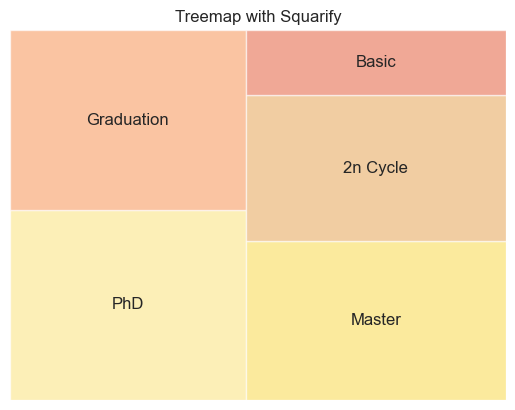

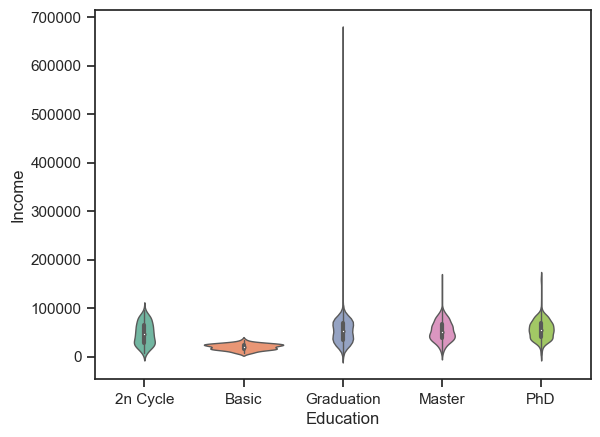

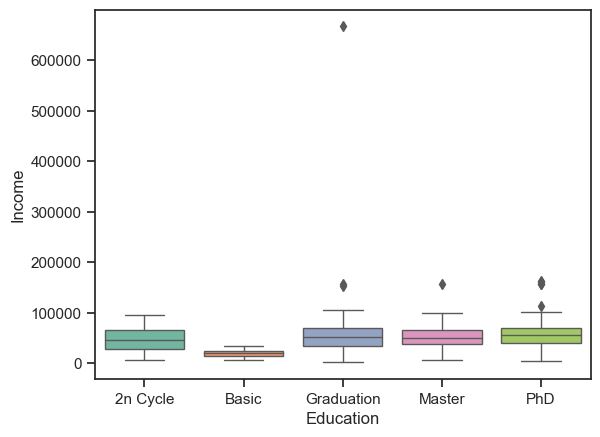

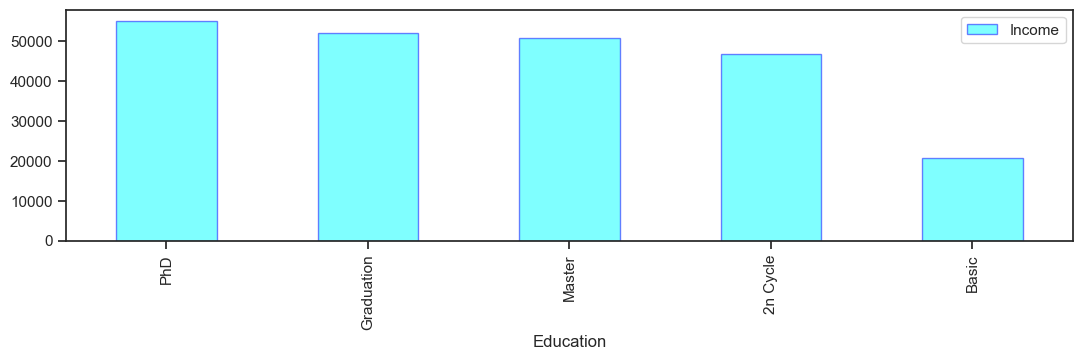

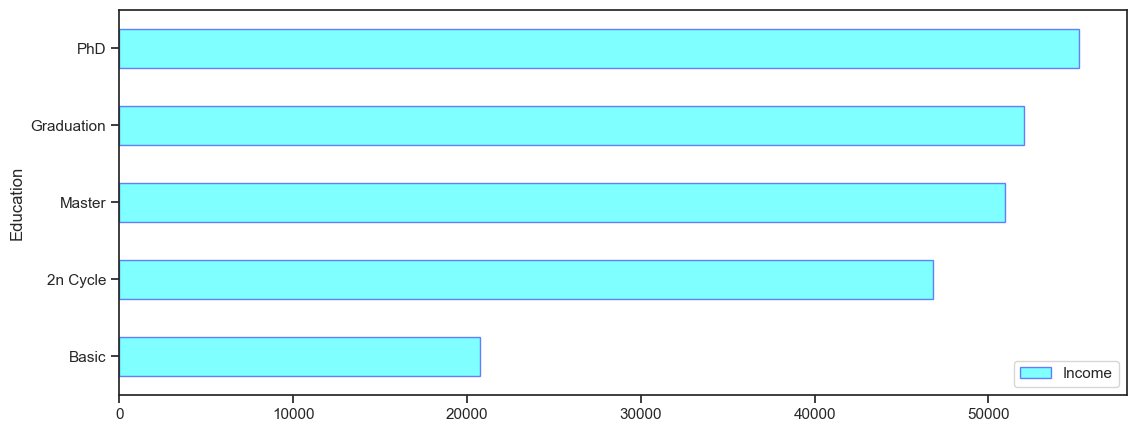

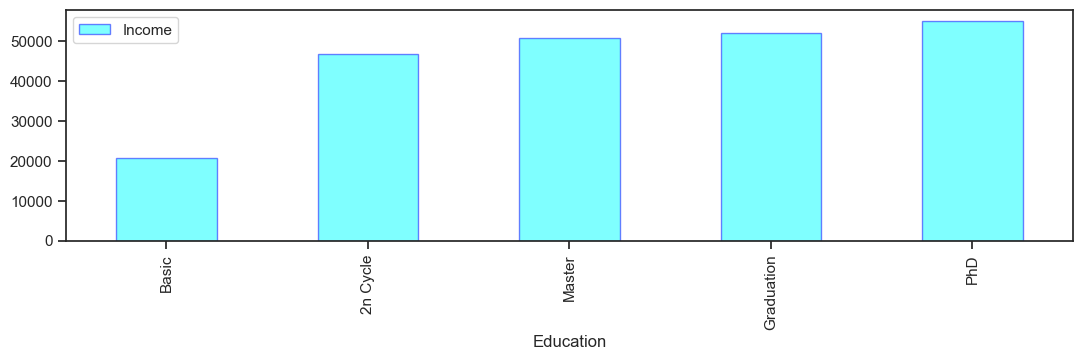

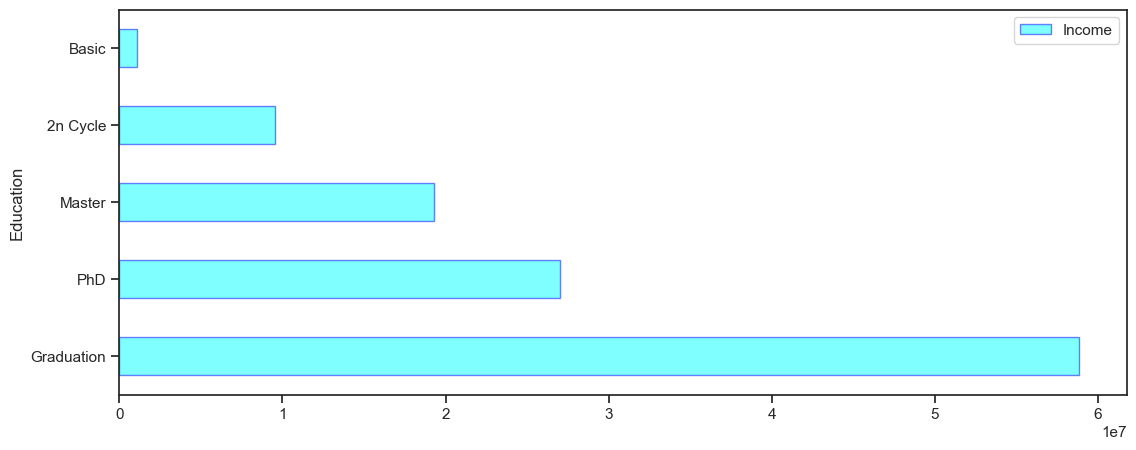

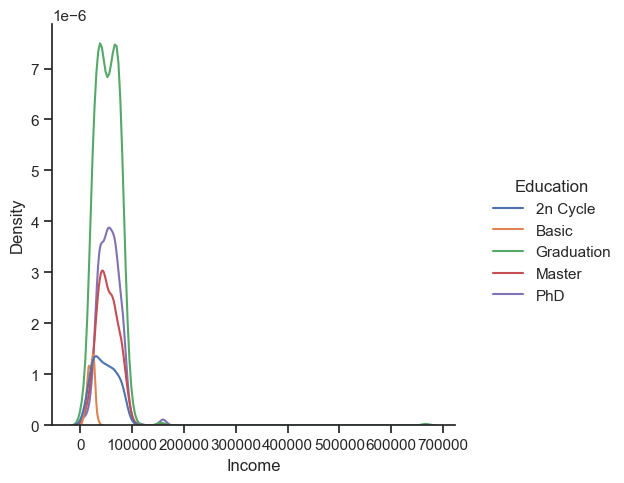

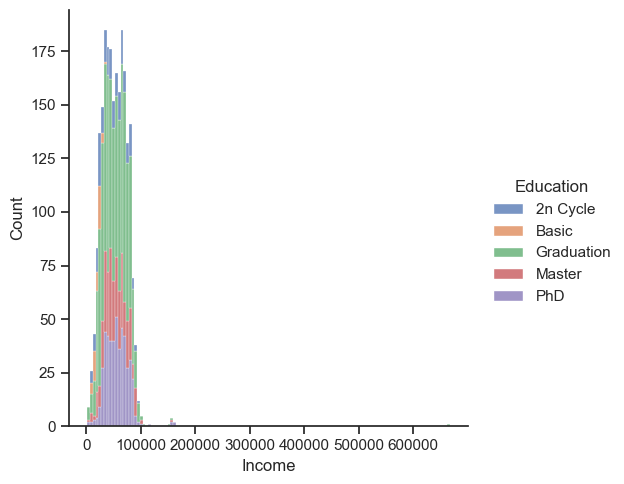


Analysis of Variance Test (ANOVA)
stat=27.739, p=0.000
Probably  different distributions  (independent)

Groups Used in Tukey's HSD
[0, '2n Cycle']
[1, 'Basic']
[2, 'Graduation']
[3, 'Master']
[4, 'PhD']

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)  27326.931     0.000 17033.309 37620.552
 (0 - 2)  -5087.184     0.055-10241.179    66.812
 (0 - 3)  -5284.344     0.104-11189.427   620.739
 (0 - 4)  -8512.124     0.000-14159.533 -2864.715
 (1 - 0) -27326.931     0.000-37620.552-17033.309
 (1 - 2) -32414.114     0.000-41766.602-23061.626
 (1 - 3) -32611.275     0.000-42397.764-22824.786
 (1 - 4) -35839.055     0.000-45472.257-26205.852
 (2 - 0)   5087.184     0.055   -66.812 10241.179
 (2 - 1)  32414.114     0.000 23061.626 41766.602
 (2 - 3)   -197.161     1.000 -4244.431  3850.110
 (2 - 4)  -3424.940     0.080 -7086.036   236.155
 (3 - 0)   5284.344     0.104  -620.739 11189.427
 (3 - 1)  32611.275     0.

In [17]:
# cat - sclr

# (manual) choose categoey & scalar to be plotted

cat  = 'Education'      # 'Education', 'Marital_Status', 'Dt_Customer'

sclr = 'Income'         # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                        # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                        # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                        # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'


# (auto)
# Sampling
np.random.seed( 3 ) 
df       = df_raw.copy().dropna()
df.index = range( len(df) )
n_Max    = df.shape[0]
df       = df.sample( n=n_Max )
df.index = range( len(df) )
df.sort_values([cat],inplace=True)

#cat = list( df[cat].copy().astype('str') )
#sc  = list( df[sclr].copy()               )


# TreeMap (median)
import squarify   #pip install squarify
df_grouped = df.groupby(cat)[sclr].median()
df_grouped = pd.DataFrame(df_grouped)
df_grouped.sort_values([sclr],ascending=False,inplace=True)
label      = df_grouped.index
sizes      = list( df_grouped[sclr] )
colors = ['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
plt.axis('off'); plt.show()



# ViolinPlot
sns_plot = sns.violinplot( x=cat, y=sclr, data=df, linewidth=1.0, palette='Set2' ); plt.show()
# BoxPlot
sns_plot = sns.boxplot(    x=cat, y=sclr, data=df, linewidth=1.0, palette='Set2' ); plt.show()


# BarPlot Top 20 (Vertical)
df.groupby(by=[cat])[sclr].median().reset_index().sort_values([sclr],ascending=False).head(20).\
plot( x=cat, y=sclr, kind='bar',  figsize=(13,3), color='cyan', edgecolor='blue', alpha=0.5 ); plt.show()
# BarPlot Top 20 (Horizontal)
df.groupby(by=[cat])[sclr].median().reset_index().sort_values([sclr],ascending=True).tail(20).\
plot( x=cat, y=sclr, kind='barh', figsize=(13,5), color='cyan', edgecolor='blue', alpha=0.5 ); plt.show()

# BarPlot Bottom 20 (Vertical)
df.groupby(by=[cat])[sclr].median().reset_index().sort_values([sclr],ascending=True).head(20).\
plot( x=cat, y=sclr, kind='bar',  figsize=(13,3), color='cyan', edgecolor='blue', alpha=0.5 ); plt.show()
# BarPlot Bottom 20 (Horizontal)
df.groupby(by=[cat])[sclr].sum().reset_index().sort_values([sclr],ascending=False).tail(20).\
plot( x=cat, y=sclr, kind='barh', figsize=(13,5), color='cyan', edgecolor='blue', alpha=0.5 ); plt.show()





# displot (1)
sns_plot = sns.displot(data=df, x=sclr, hue=cat,     kind="kde"  ); plt.show()
# displot (2)
sns_plot = sns.displot(data=df, x=sclr, hue=cat, multiple="stack"); plt.show()





# List of Scalars: sc1, sc2, sc3, ...
SubCats = df[cat].unique()
Sclrs   = []
for subcat in SubCats:
    sclr_list = list(df.loc[ df[cat]==subcat, sclr ])
    Sclrs.append( sclr_list )

##
## Parametric Statistical Hypothesis Tests
##

# Analysis of Variance Test (ANOVA):   Tests whether the means of two or more independent samples are significantly different.
print("\nAnalysis of Variance Test (ANOVA)")
from scipy.stats import f_oneway 
sc0 = Sclrs[0]
sc1 = Sclrs[1]
sc2 = Sclrs[2]
sc3 = Sclrs[3]
sc4 = Sclrs[4]
stat, p = f_oneway( sc0, sc1, sc2, sc3, sc4
                  )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably  the same distribution   (dependent)' )
else       : print('Probably  different distributions  (independent)')
    
# Printing SubCats
print("\nGroups Used in Tukey's HSD")
i=0
for SubCat in SubCats:
    print([i,SubCat])
    i = i+1
print('')
    
# Tukey_HSD
from scipy.stats import tukey_hsd
print( tukey_hsd( sc0, sc1, sc2, sc3, sc4 ) )



# Kruskal-Wallis H Test:   Tests whether the distributions of two or more independent samples are equal or not.
print("\nKruskal-Wallis H Test") 
from scipy.stats import kruskal 
sc0 = Sclrs[0]
sc1 = Sclrs[1]
sc2 = Sclrs[2]
sc3 = Sclrs[3]
sc4 = Sclrs[4]
stat, p = kruskal( sc0, sc1, sc2, sc3, sc4
                 )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probably  the same distribution   (dependent)' )
else       : print('Probably  different distributions  (independent)') 

#####   

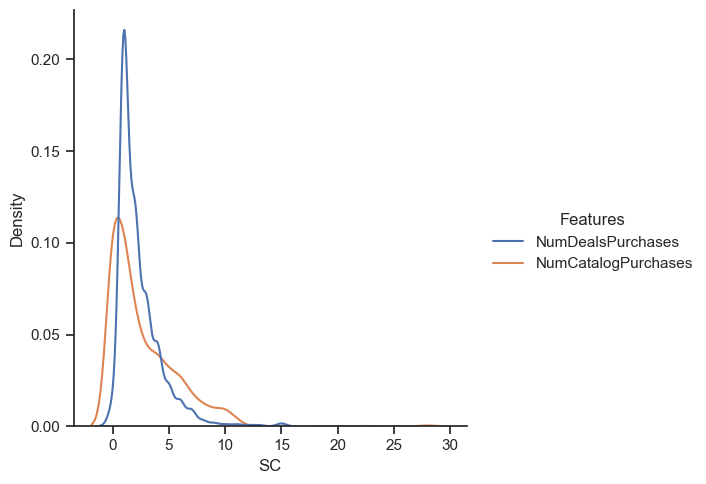

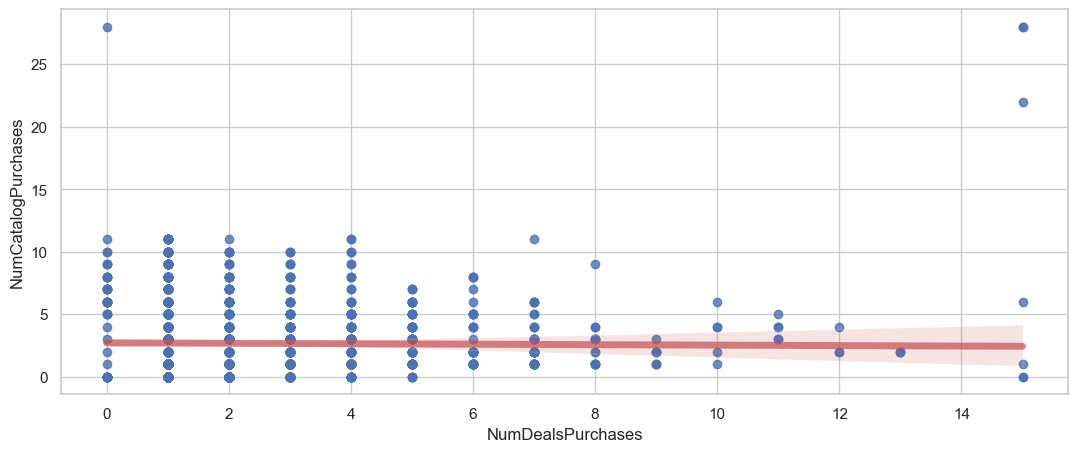

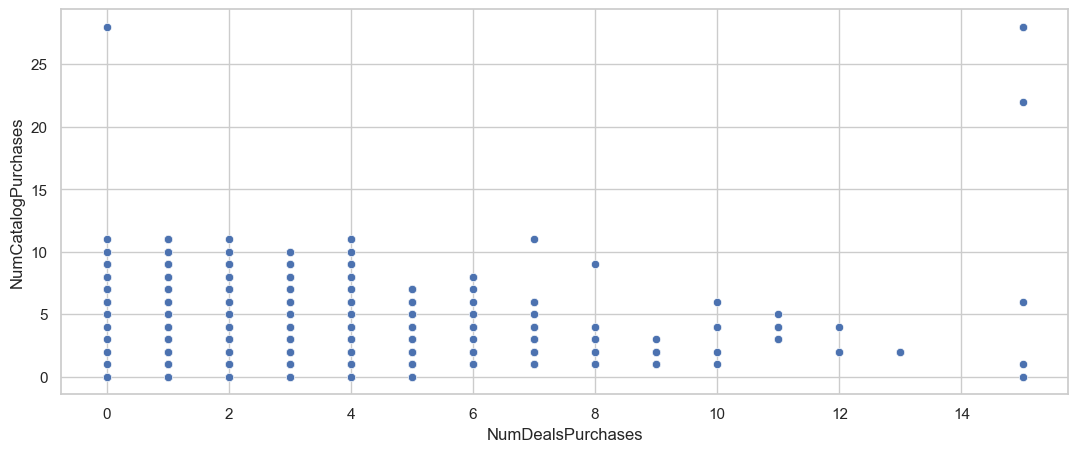

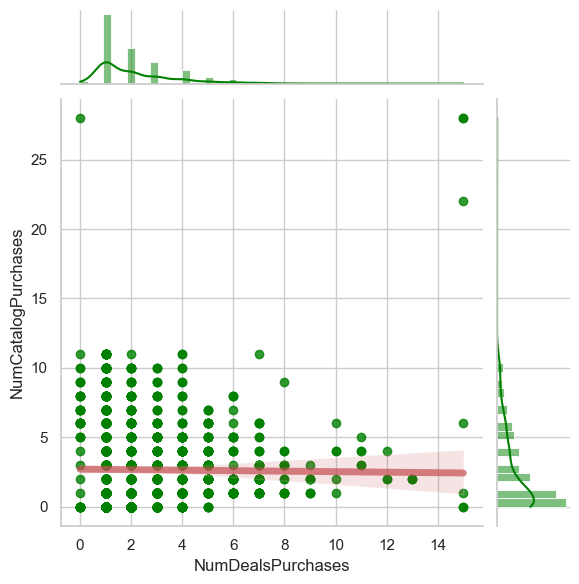

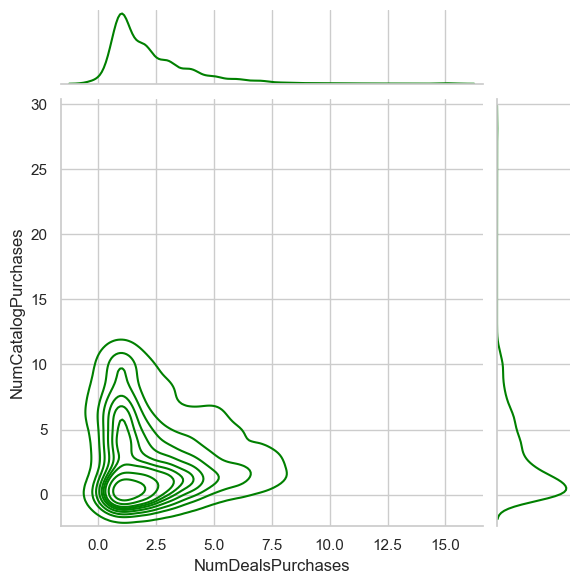

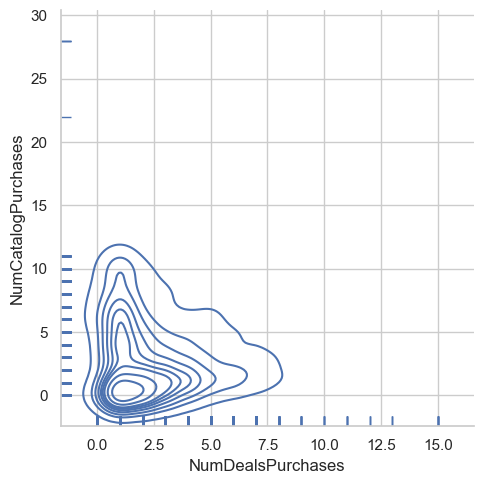

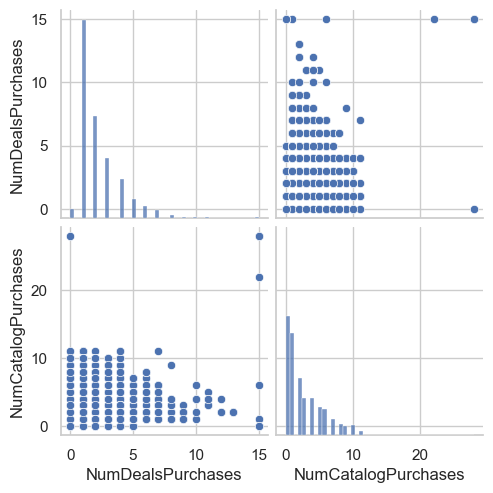

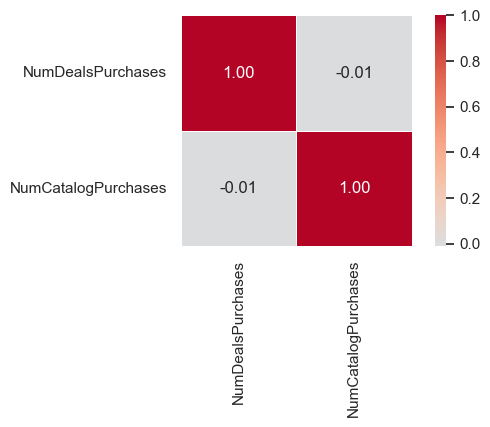




Non-Paired Samples Tests:

Mann-Whitney U Test:  (Non-Parametric, Median-Based Test)
stat=2575378.500, p=0.004, Independent Samples

Spearman's Rank Correlation Test:  (Non-Parametric, strength of linear relationship)
stat=-0.044, p=0.039, Correlated


Student’s t-test:  (Parametric, Mean-Based Test)
stat=-4.670, p=0.000, Independent Samples

Pearson's Correlation Test:  (Parametric, strength of linear relationship)
stat=-0.012, p=0.569, Not Correlated




Paired-Samples Tests:

Wilcoxon Signed-Rank Test:  (Non-Parametric, Median-Based Test)
stat=915796.500, p=0.070, Independent Samples

Paired Student’s t-test:  (Parametric, Mean-Based Test)
stat=-4.645, p=0.000, Dependent Samples




Ordinal-Samples Tests:

Kendall's Rank Correlation Test:
stat=-0.027, p=0.107, Not Correlated


In [18]:
# sclr - sclr

# (manual) choose scalars to be plotted

sclr1 = 'NumDealsPurchases'         # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2 = 'NumCatalogPurchases'       # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                    # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                    # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'


# Sampling
np.random.seed(3); 
df = df_raw.copy().dropna()
df = df.sample(n=min(3000,df.shape[0]))

sc1 = list( df[sclr1].copy() )
sc2 = list( df[sclr2].copy() )


# displot (1)
sc_A, sc_B = [], []
for i in range(len(sc1)): sc_A.append(sclr1)
for i in range(len(sc2)): sc_B.append(sclr2)
df_sc = pd.DataFrame([ sc1+sc2, sc_A+sc_B ]).T
df_sc.columns = ['SC','Features']
sns_plot = sns.displot(data=df_sc, x='SC', hue='Features', kind="kde"); plt.show()


# Reg-Plot
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.regplot( x=sclr1, y=sclr2, data=df, line_kws={"color":"r","alpha":0.7,"lw":5} ) 
fig = sns_plot.get_figure(); fig.savefig('scatterplot.png'); plt.show()


# Scatter-Plot 
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.scatterplot( data=df, x=sclr1, y=sclr2, markers=True )  
fig = sns_plot.get_figure(); fig.savefig('scatterplot.png'); plt.show()


# Joint-Plot (1)
sns_plot = sns.jointplot( x=sclr1, y=sclr2, data=df, color='green', kind='reg', dropna=True, line_kws={"color":"r","alpha":0.7,"lw":5} )
sns_plot.savefig('jointplot.png'); plt.show()
# Joint-Plot (2)
sns_plot = sns.jointplot( x=sclr1, y=sclr2, data=df, color='green', kind='kde', dropna=True )
sns_plot.savefig('jointplot.png'); plt.show()


# displot
sns.displot( data=df, x=sclr1, y=sclr2, kind='kde', rug=True ); plt.show()
 

# PairPlot
sns.pairplot( data=df, vars=[sclr1,sclr2] ); plt.show()


# Correlation-Matrix
f,ax = plt.subplots(figsize=(6,3))
corr = df[ [sclr1,sclr2] ].corr('pearson')
sns_plot = sns.heatmap( corr,  mask=np.zeros_like(corr,dtype=bool),  cmap='coolwarm',
                        square=True, ax=ax, annot=True, center=0.00, fmt='.2f', linewidth=.5 ) 
fig = sns_plot.get_figure(); fig.savefig('heatmap.png'); plt.show()
 
    
    
    
    
##
## Non-Paired Samples Tests
##
print("\n\n\nNon-Paired Samples Tests:")

# Mann-Whitney U Test:   Tests whether the distributions of two independent samples are equal or not.
print("\nMann-Whitney U Test:  (Non-Parametric, Median-Based Test)")
from scipy.stats import mannwhitneyu  
stat, p = mannwhitneyu( sc1, sc2 )
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples') 
    
# Spearman's Rank Correlation Test
print("\nSpearman's Rank Correlation Test:  (Non-Parametric, strength of linear relationship)")
from scipy.stats import spearmanr
stat, p = spearmanr( sc1, sc2 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Correlated')
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Not Correlated') 

    
# Student’s t-test:   Tests whether the means of two independent samples are significantly different. 
print("\n\nStudent’s t-test:  (Parametric, Mean-Based Test)") 
from scipy.stats import ttest_ind
stat, p = ttest_ind( sc1, sc2 )
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples') 
    
# Pearson's Correlation Test
print("\nPearson's Correlation Test:  (Parametric, strength of linear relationship)")
from scipy.stats import pearsonr
stat, p = pearsonr( sc1, sc2 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Correlated')
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Not Correlated') 


    
##
## Paired-Samples Tests
##
print("\n\n\n\nPaired-Samples Tests:")

# Wilcoxon Signed-Rank Test:   Tests whether the distributions of two paired samples are equal or not. 
print("\nWilcoxon Signed-Rank Test:  (Non-Parametric, Median-Based Test)")
from scipy.stats import wilcoxon 
stat, p = wilcoxon( sc1, sc2 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples') 

# Paired Student’s t-test:   Tests whether the means of two paired samples are significantly different.
print("\nPaired Student’s t-test:  (Parametric, Mean-Based Test)")
from scipy.stats import ttest_rel 
stat, p = ttest_rel( sc1, sc2 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')  


    
##
## Ordinal Samples Tests
##
print("\n\n\n\nOrdinal-Samples Tests:")    
  
# Kendall's Rank Correlation Test
print("\nKendall's Rank Correlation Test:")
from scipy.stats import kendalltau
stat, p = kendalltau( sc1, sc2 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Correlated')
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Not Correlated'  ) 


    
##
## Categorical Samples Tests
##
''' 
print("\n\n\n\nCategorical-Samples Tests:")

# Chi-Squared Test
from scipy.stats import chi2_contingency
print("\nChi-Squared Test:")
table = [ sc1, sc2 ]
stat, p, dof, expected = chi2_contingency(table)
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')
''' 
pass

#####   

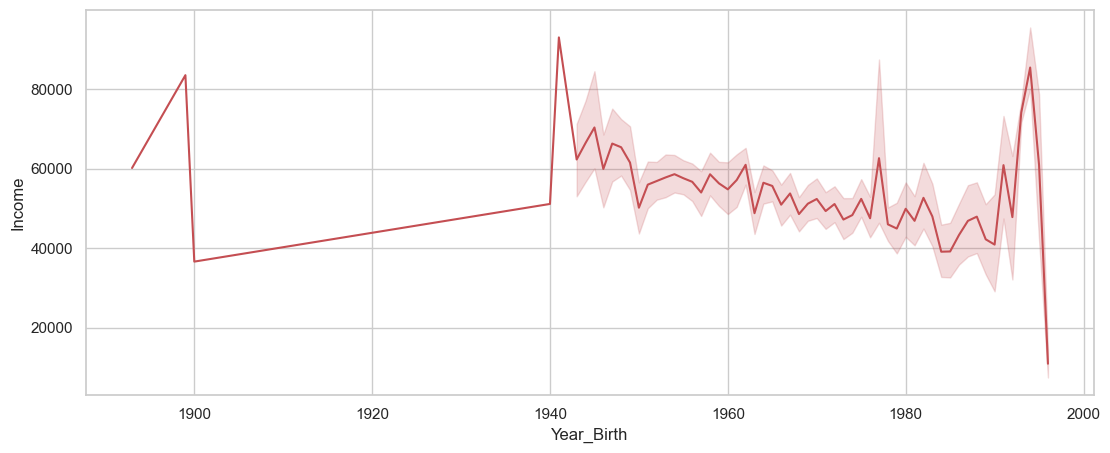

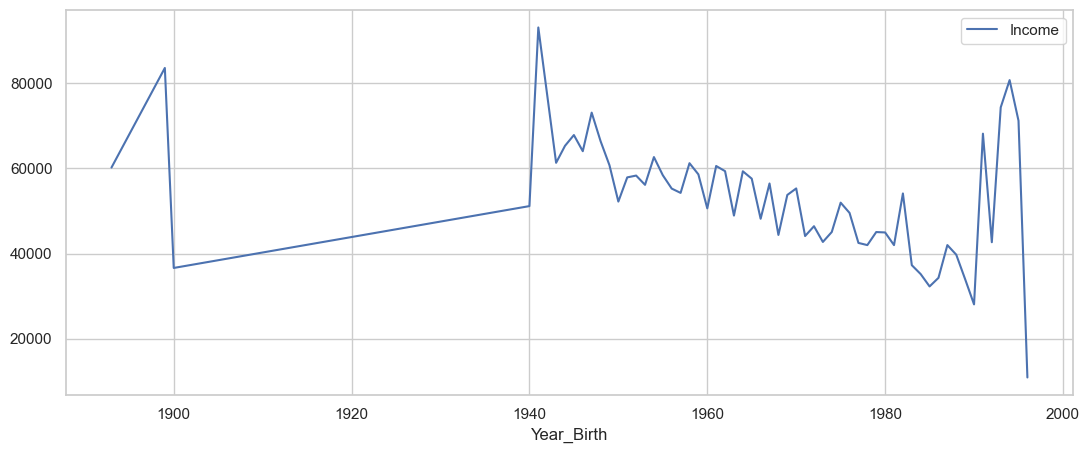

In [19]:
# TimeSeries - sclr
sclr_time = 'Year_Birth'    # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2     = 'Income'        # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                            # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'


# lineplot (mean)
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid');
sns_plot = sns.lineplot(x=sclr_time, y=sclr2, data=df_raw, markers=True, color='r')  # hue='cat1', style='cat2'
fig = sns_plot.get_figure(); fig.savefig('lineplot.png'); plt.show()

# Trend (median)
df_raw[[sclr_time,sclr2]].groupby([sclr_time]).median().plot(figsize=(13,5)); plt.show()

#####   

cat_rate
0    2219
1      21
Name: count, dtype: int64


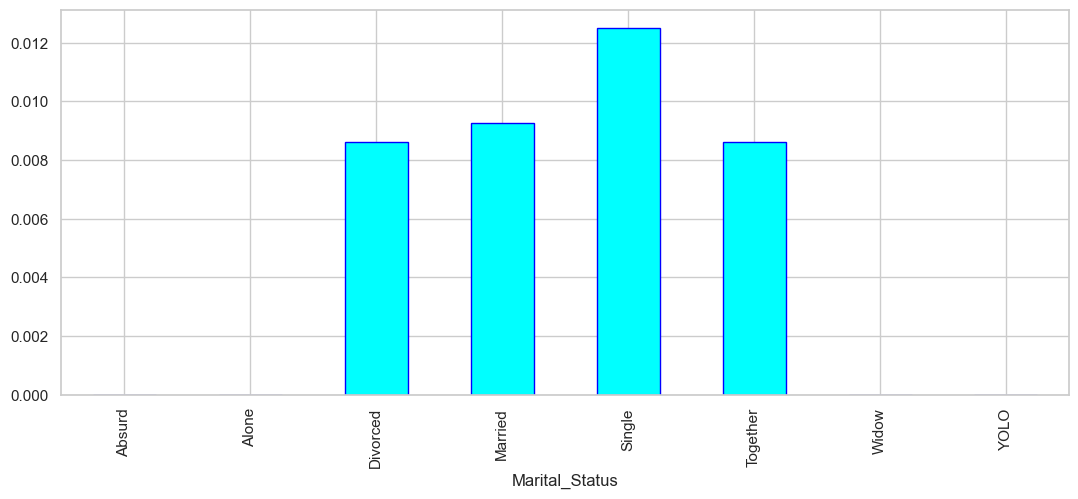

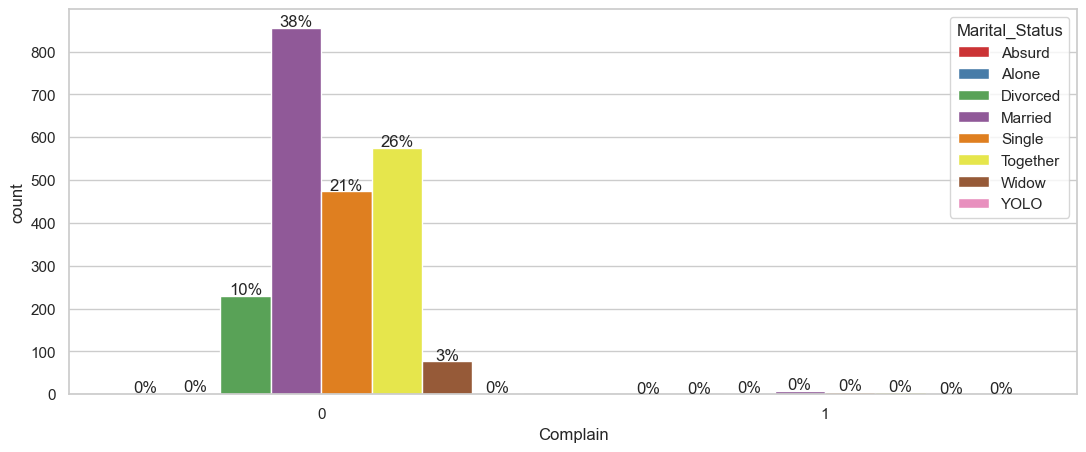

In [20]:
# cat - cat
cat1 = estimated_column     #  estimated_column
cat2 = 'Marital_Status'     # 'Education', 'Marital_Status', 'Dt_Customer'

# bar
df = df_raw.copy()
df['cat_rate'] = np.where( df[cat1].astype('str') == '1', 1, 0 ); print( df.cat_rate.value_counts() )
df.groupby(cat2)['cat_rate'].mean().plot.bar(color='cyan',edgecolor='blue'); plt.show()

# countplot
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.countplot( x=cat1, hue=cat2, data=df_raw.sort_values([cat2]), palette='Set1' ) 
total = float( df_raw.shape[0] )
for p in sns_plot.patches:
    height=p.get_height()
    sns_plot.text(p.get_x()+p.get_width()/2.,height+3,'{0:.0%}'.format(height/total),ha='center')
fig = sns_plot.get_figure(); fig.savefig('countplot.png'); plt.show()

#####   
# Trivariate Analysis

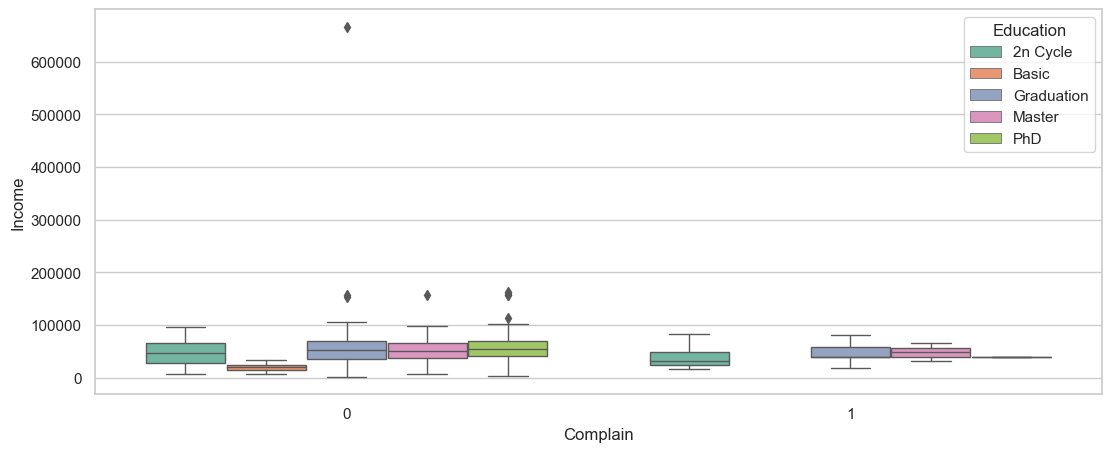

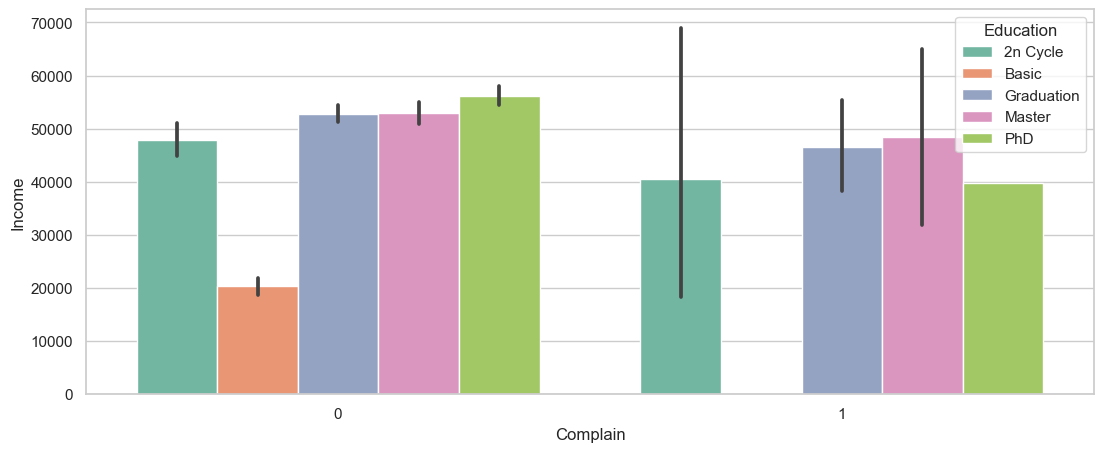

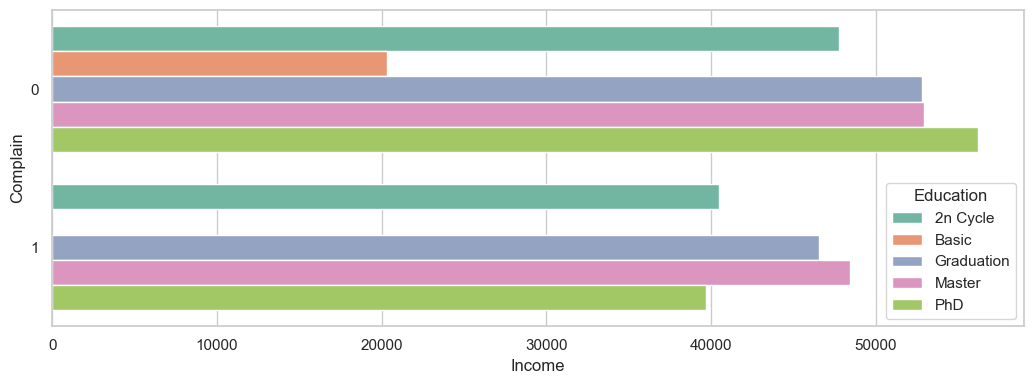

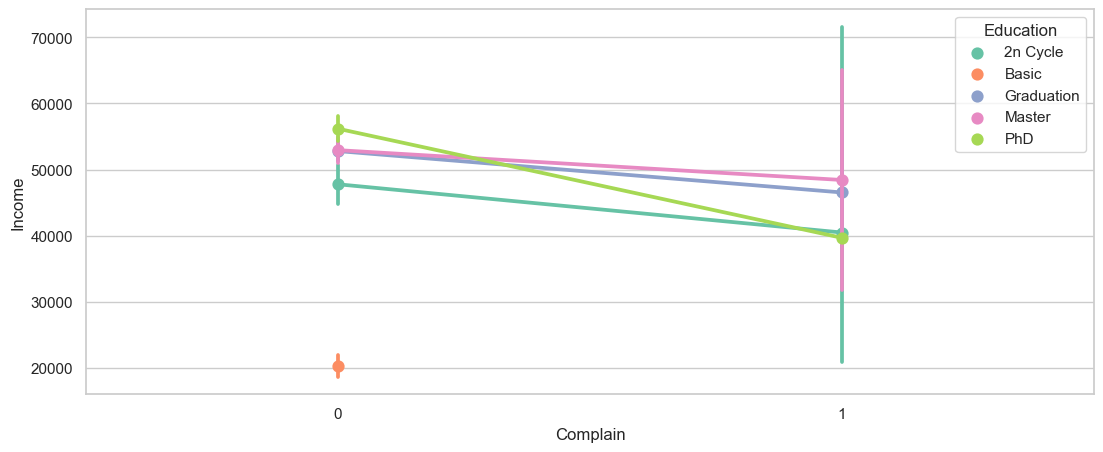

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_2828\2419207129.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns_plot = sns.displot(data=df, x=sclr, hue=cat, col=hue,     kind="kde"  ); plt.show()


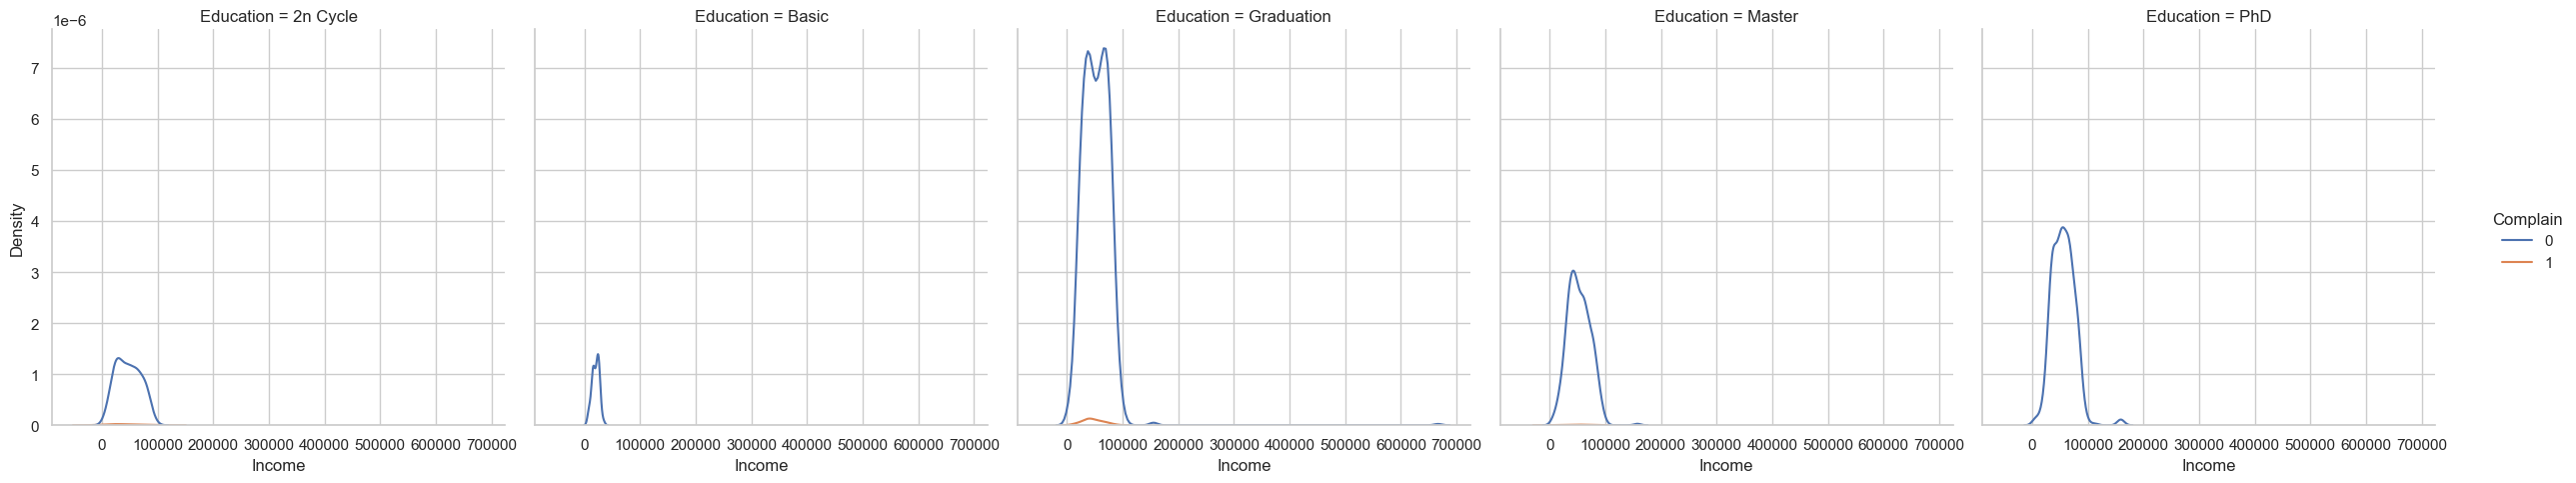

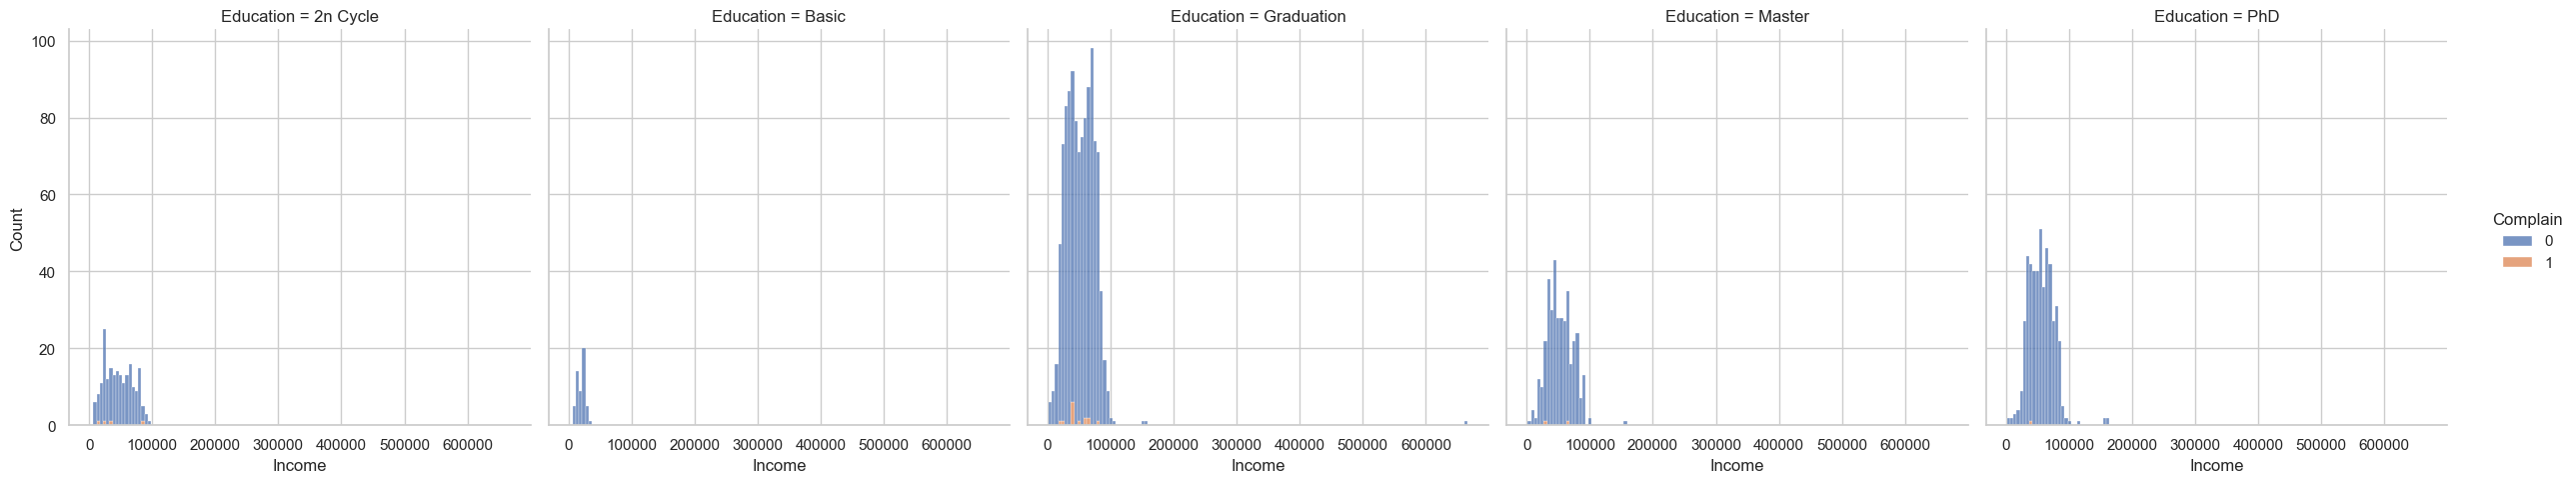

In [21]:
# cat-cat - sclr
hue  = 'Education'        # 'Education', 'Marital_Status', 'Dt_Customer'
cat  = estimated_column   #  estimated_column

sclr = 'Income'           # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                          # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                          # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                          # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'

df      = df_raw[ [hue,cat,sclr] ].copy().dropna().sort_values([hue,cat],ascending=[True,True])
df[cat] = df[cat].astype(str)
df[hue] = df[hue].astype(str)

# BoxPlot
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.boxplot( x=cat, y=sclr, data=df, linewidth=1.0, palette='Set2', hue=hue ) 
fig = sns_plot.get_figure(); fig.savefig('boxplot.png'); plt.show()

# BarPlot  (Vertical) ( mean of sclr )
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.barplot( x=cat, y=sclr, data=df, hue=hue, palette='Set2' )  
fig = sns_plot.get_figure(); fig.savefig('barplot.png'); plt.show()

# BarPlot (Horizontal)
Group    = df[sclr].groupby( [df[hue], df[cat]] ).mean().reset_index() #.sort_values( by=[y], ascending=[False] )
fig      = plt.figure( figsize=(10.5,4) )
sns_plot = sns.barplot( y=cat, x=sclr, hue=hue, data=Group, palette='Set2' )
plt.tight_layout()
fig = sns_plot.get_figure(); fig.savefig('barplot_h.png'); plt.show()

# Point Plot
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.pointplot( x=cat, y=sclr, data=df, hue=hue, palette='Set2' )  
fig = sns_plot.get_figure(); fig.savefig('pointplot.png'); plt.show()

# displot (1)
sns_plot = sns.displot(data=df, x=sclr, hue=cat, col=hue,     kind="kde"  ); plt.show()
# displot (2)
sns_plot = sns.displot(data=df, x=sclr, hue=cat, col=hue, multiple="stack"); plt.show()

#####   

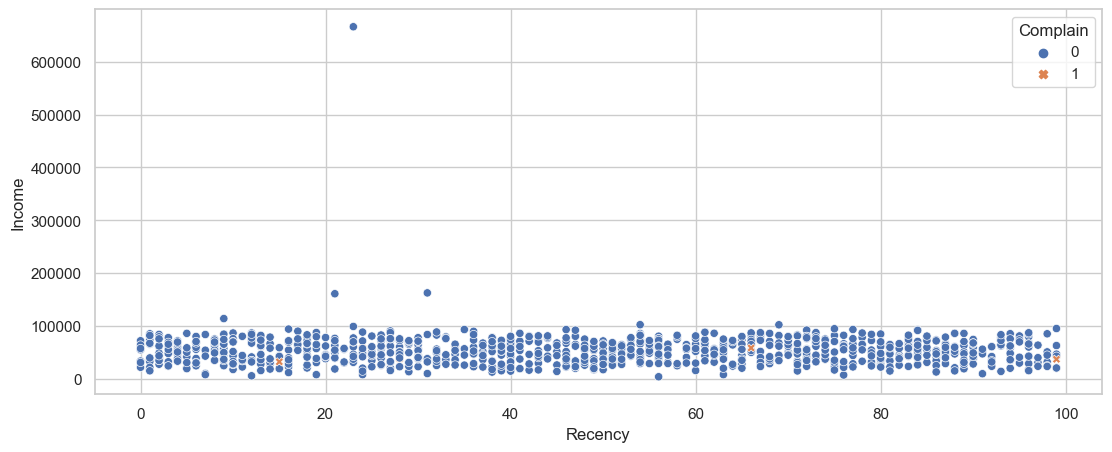

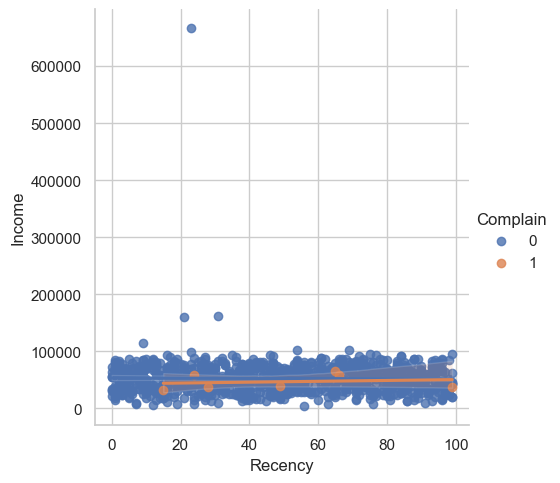

In [22]:
# sclr-sclr - cat

cat   = estimated_column  #  estimated_column, 'Education', 'Marital_Status', 'Dt_Customer'

sclr1 = 'Recency'         # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2 = 'Income'          # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                          # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                          # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'

# Sampling
np.random.seed(3)
df = df_raw.dropna()
df = df.sample(n=min(1000,df.shape[0]))

# Scatter-Plot 
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid')
sns_plot = sns.scatterplot( x=sclr1, y=sclr2, hue=cat, style=cat, data=df, markers=True ) 
#sns_plot.set( title="scatterplot" )
fig = sns_plot.get_figure(); fig.savefig('scatterplot.png'); plt.show()

# ImPlot 
sns.lmplot( x=sclr1, y=sclr2, data=df, hue=cat, height=5 ); plt.show() 

#####   

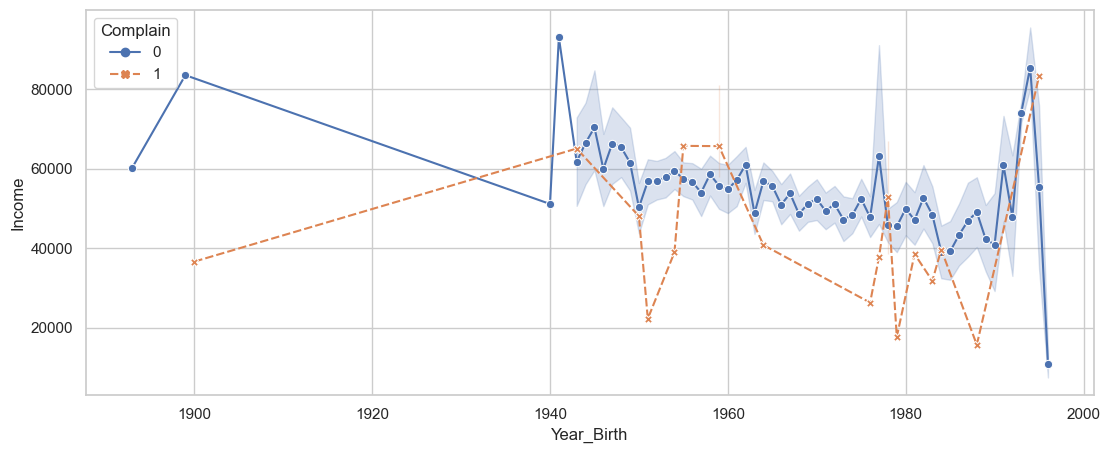

In [23]:
# sclr(time)-sclr - cat

sclr_time = 'Year_Birth'       # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2     = 'Income'           # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                               # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                               # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'
        
cat       = estimated_column   #  estimated_column, 'Education', 'Marital_Status', 'Dt_Customer'

        
# lineplot
sns.set(rc={'figure.figsize':(13,5)}); sns.set(style='whitegrid');
sns_plot = sns.lineplot( x=sclr_time, y=sclr2, data=df_raw, hue=cat, style=cat, markers=True )
fig = sns_plot.get_figure(); fig.savefig('lineplot.png'); plt.show()

#####   

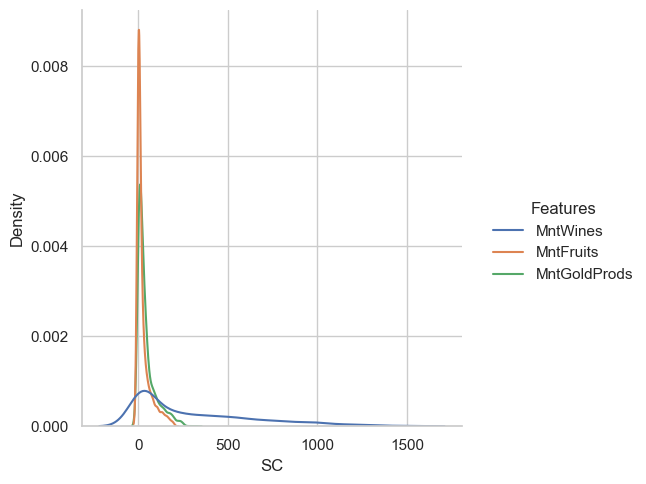

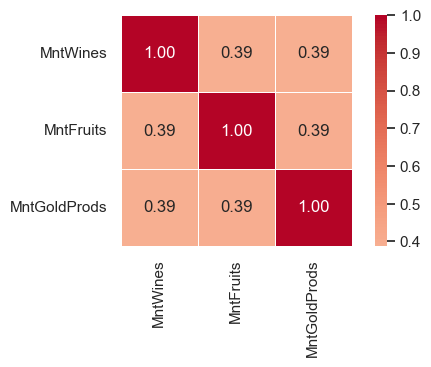

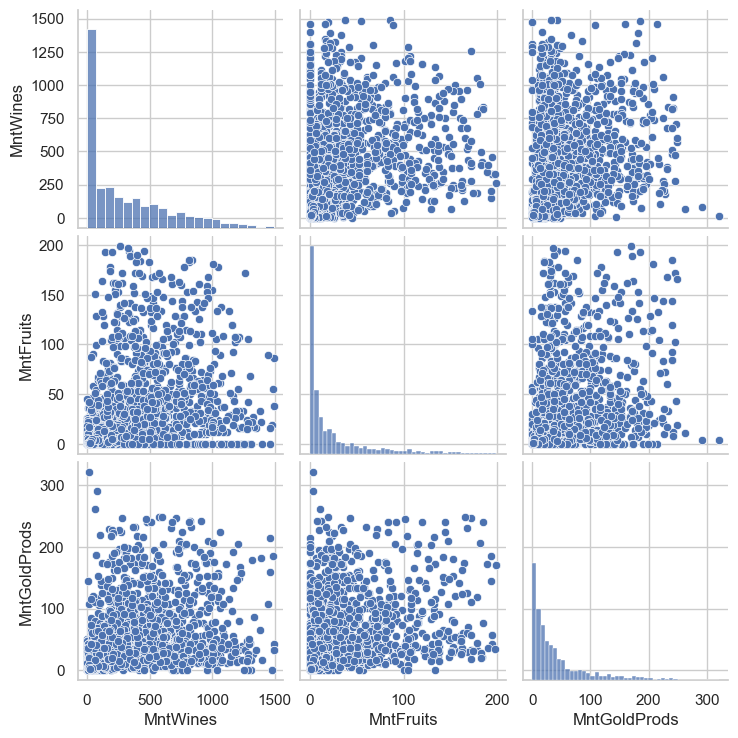




Non-Paired Samples Tests:

Kruskal-Wallis H Test  (Non-Parametric, Median-Based Test)
stat=1756.199, p=0.000, Independent Samples

Analysis of Variance Test (ANOVA):  (Parametric, Mean-Based Test)
stat=1372.024, p=0.000, Independent Samples

Groups Used in Tukey's HSD
[0, 'MntWines']
[1, 'MntFruits']
[2, 'MntGoldProds']

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    278.736     0.000   264.765   292.706
 (0 - 2)    261.126     0.000   247.156   275.097
 (1 - 0)   -278.736     0.000  -292.706  -264.765
 (1 - 2)    -17.609     0.009   -31.580    -3.639
 (2 - 0)   -261.126     0.000  -275.097  -247.156
 (2 - 1)     17.609     0.009     3.639    31.580





Paired-Samples Tests:

Friedman Test:  (Non-Parametric, Median-Based Test)
stat=2457.501, p=0.000, Dependent Samples

Repeated Measures ANOVA Test
Currently not supported in Python




Ordinal-Samples Tests:

Kendall's Rank Correlation Test:
stat=0.35

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_2828\2040261599.py:100: DeprecationWarning: 'kendalltau' keyword argument 'initial_lexsort' is deprecated as it is unused and will be removed in SciPy 1.12.0.
  stat, p = kendalltau( sc1, sc2, sc3 )


In [24]:
# sclr - sclr - sclr 
sclr1 = 'MntWines'        # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2 = 'MntFruits'       # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
sclr3 = 'MntGoldProds'    # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                          # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'

# Sampling
np.random.seed(3); 
df = df_raw.dropna()
df = df.sample(n=min(3000,df.shape[0]))

sc1 = list( df[sclr1].copy() )
sc2 = list( df[sclr2].copy() )
sc3 = list( df[sclr3].copy() )


# displot (1)
sc_A, sc_B, sc_C = [], [], []
for i in range(len(sc1)): sc_A.append(sclr1)
for i in range(len(sc2)): sc_B.append(sclr2)
for i in range(len(sc3)): sc_C.append(sclr3)
df_sc = pd.DataFrame([ sc1+sc2+sc3, sc_A+sc_B+sc_C ]).T
df_sc.columns = ['SC','Features'] 
sns_plot = sns.displot(data=df_sc, x='SC', hue='Features', kind="kde"); plt.show()

# Correlation-Matrix
f,ax = plt.subplots(figsize=(6,3))
corr = df_raw[ [sclr1,sclr2,sclr3] ].corr('pearson')
sns_plot = sns.heatmap( corr, mask=np.zeros_like(corr,dtype=bool), cmap='coolwarm',
                        square=True, ax=ax, annot=True, center=0.00, fmt='.2f', linewidth=.5 ) 
fig = sns_plot.get_figure(); fig.savefig('heatmap.png'); plt.show()

# PairPlot
sns.pairplot( data=df, vars=[sclr1,sclr2,sclr3] ); plt.show()

 




##
## Non-Paired Samples Tests
##
print("\n\n\nNon-Paired Samples Tests:")

# Kruskal-Wallis H Test:   Tests whether the distributions of two or more independent samples are equal or not.
print("\nKruskal-Wallis H Test  (Non-Parametric, Median-Based Test)") 
from scipy.stats import kruskal 
stat, p = kruskal( sc1, sc2, sc3 )
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')     
    
# Analysis of Variance Test (ANOVA):   Tests whether the means of two or more independent samples are significantly different.
print("\nAnalysis of Variance Test (ANOVA):  (Parametric, Mean-Based Test)")
from scipy.stats import f_oneway 
stat, p = f_oneway( sc1, sc2, sc3 )
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')

# Printing Groups Used in Tukey's HSD
print("\nGroups Used in Tukey's HSD")
i = 0
for sclr in [sclr1,sclr2,sclr3]:
    print([i, sclr])
    i = i+1    
    
# Tukey_HSD
from scipy.stats import tukey_hsd
print('') 
print( tukey_hsd( sc1, sc2, sc3 ) )


    
##
## Paired-Samples Tests
##
print("\n\n\n\nPaired-Samples Tests:")

# Friedman Test:   Tests whether the distributions of two or more paired samples are equal or not.
print("\nFriedman Test:  (Non-Parametric, Median-Based Test)")  
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare( sc1, sc2, sc3 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')   

# Repeated Measures ANOVA Test:   Tests whether the means of two or more paired samples are significantly different.
print("\nRepeated Measures ANOVA Test")
print("Currently not supported in Python")


    
##
## Ordinal Samples Tests
##
print("\n\n\n\nOrdinal-Samples Tests:")    
  
# Kendall's Rank Correlation Test
print("\nKendall's Rank Correlation Test:")
from scipy.stats import kendalltau
stat, p = kendalltau( sc1, sc2, sc3 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Correlated')
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Not Correlated'  ) 


    
##
## Categorical Samples Tests
##
print("\n\n\n\nCategorical-Samples Tests:")

# Chi-Squared Test
from scipy.stats import chi2_contingency
print("\nChi-Squared Test:")
table = [ sc1, sc2, sc3 ]
stat, p, dof, expected = chi2_contingency(table)
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples') 

#####   

# Multivariate Analysis

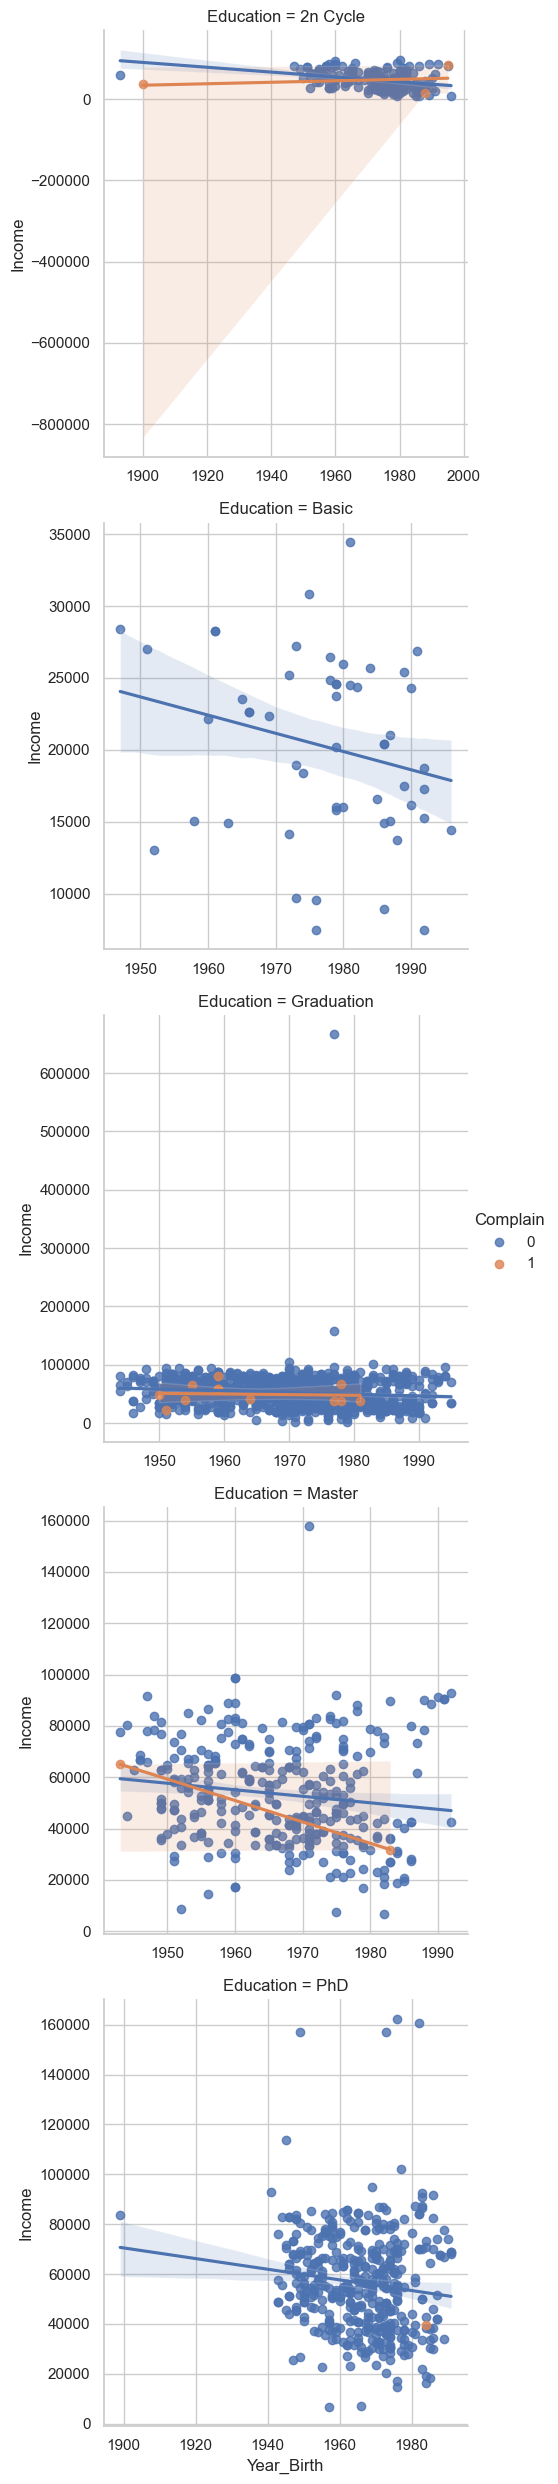

In [25]:
# sclr-sclr - cat-cat

sclr1 = 'Year_Birth'        # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2 = 'Income'            # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                            # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'
        
cat1  = estimated_column    #  estimated_column, 'Education', 'Marital_Status', 'Dt_Customer'
cat2  = 'Education'


# Sampling
np.random.seed(3)
df = df_raw.dropna()
df = df.sample(n=min(2000,df.shape[0])).sort_values([cat2])

 
# ImPlot 
sns.lmplot( x=sclr1, y=sclr2, data=df, hue=cat1, col=None, row=cat2, height=5,
            facet_kws=dict(sharex=False, sharey=False) )
plt.show()


#####   

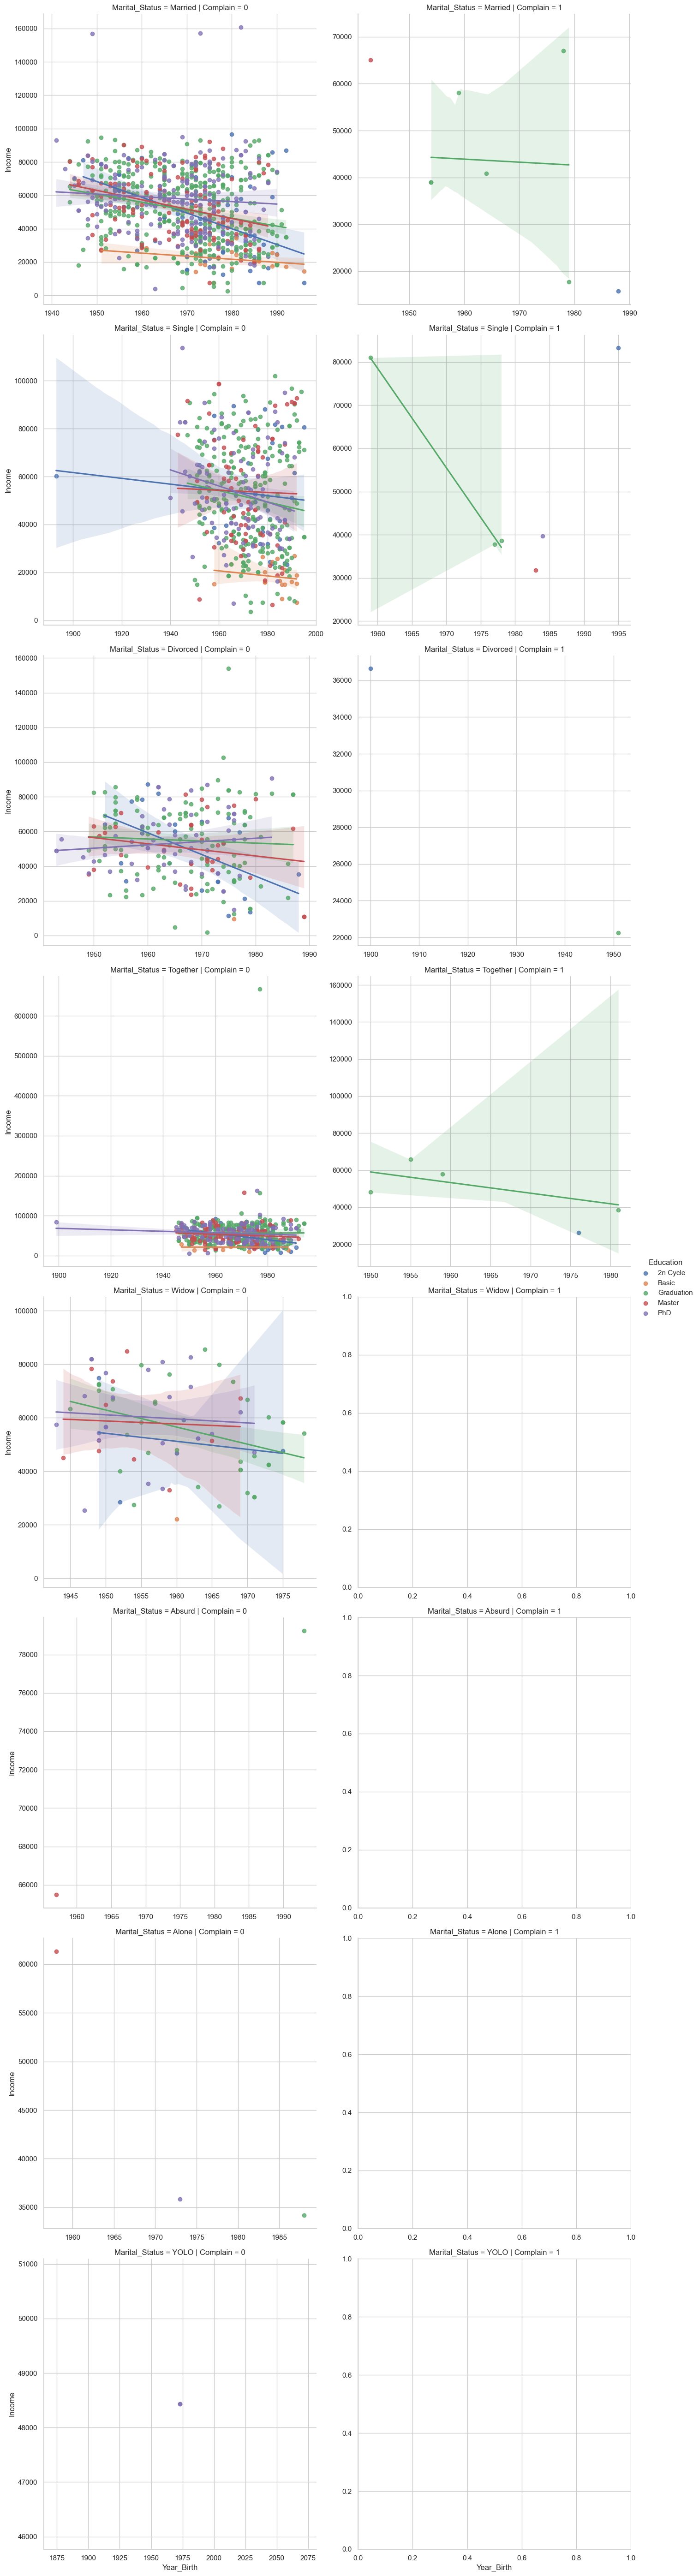

In [26]:
# sclr-sclr - cat-cat-cat

sclr1 = 'Year_Birth'        # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2 = 'Income'            # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                            # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'
        
cat1  = estimated_column    #  estimated_column, 'Education', 'Marital_Status', 'Dt_Customer'
cat2  = 'Education'
cat3  = 'Marital_Status'


# Sampling
np.random.seed(3); 
df = df_raw.dropna()
df = df.sample(n=min(3000,df.shape[0])).sort_values([cat2])

# ImPlot 
sns.lmplot( x=sclr1, y=sclr2, data=df, hue=cat2, col=cat1, row=cat3, height=7,
            facet_kws=dict(sharex=False, sharey=False) )
plt.show()


#####   

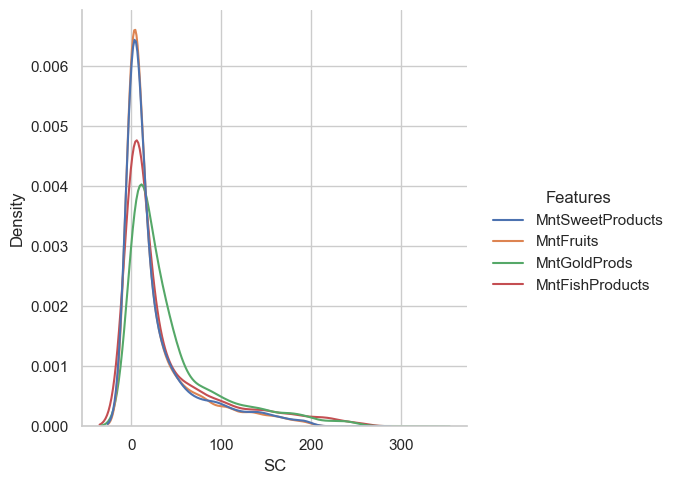

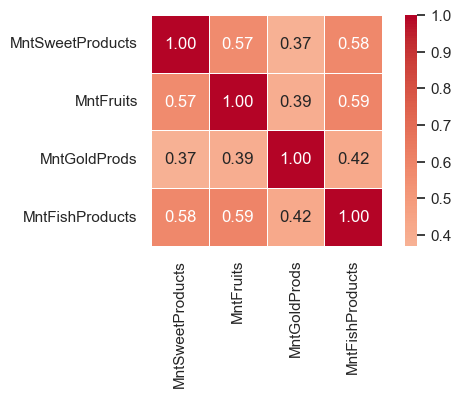

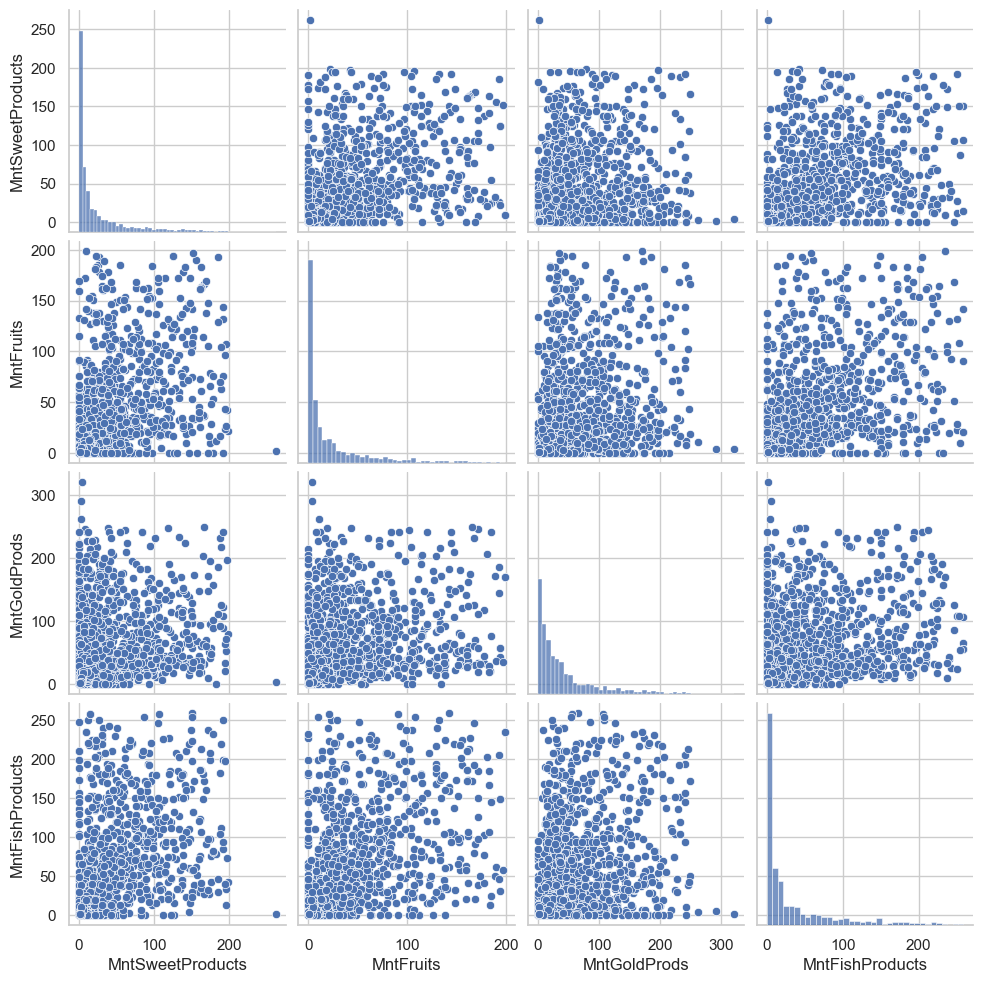




Non-Paired Samples Tests:

Kruskal-Wallis H Test  (Non-Parametric, Median-Based Test)
stat=445.051, p=0.000, Independent Samples

Analysis of Variance Test (ANOVA):  (Parametric, Mean-Based Test)
stat=72.376, p=0.000, Independent Samples

Groups Used in Tukey's HSD
[0, 'MntSweetProducts']
[1, 'MntFruits']
[2, 'MntGoldProds']
[3, 'MntFishProducts']

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.673     0.965    -2.979     4.325
 (0 - 2)    -16.936     0.000   -20.588   -13.284
 (0 - 3)    -10.609     0.000   -14.261    -6.957
 (1 - 0)     -0.673     0.965    -4.325     2.979
 (1 - 2)    -17.609     0.000   -21.261   -13.957
 (1 - 3)    -11.282     0.000   -14.934    -7.630
 (2 - 0)     16.936     0.000    13.284    20.588
 (2 - 1)     17.609     0.000    13.957    21.261
 (2 - 3)      6.328     0.000     2.676     9.980
 (3 - 0)     10.609     0.000     6.957    14.261
 (3 - 1)     11.282     0.00

In [27]:
# sclr - sclr - sclr - sclr  

sclr1 = 'MntSweetProducts' # 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
sclr2 = 'MntFruits'        # 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
sclr3 = 'MntGoldProds'     # 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
sclr4 = 'MntFishProducts'  # 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'

# Sampling
np.random.seed(3); 
df = df_raw.dropna()
df = df.sample(n=min(3000,df.shape[0]))

sc1 = list( df[sclr1].copy() )
sc2 = list( df[sclr2].copy() )
sc3 = list( df[sclr3].copy() )
sc4 = list( df[sclr4].copy() )


# displot (1)
sc_A, sc_B, sc_C, sc_D = [], [], [], []
for i in range(len(sc1)): sc_A.append(sclr1)
for i in range(len(sc2)): sc_B.append(sclr2)
for i in range(len(sc3)): sc_C.append(sclr3)
for i in range(len(sc4)): sc_D.append(sclr4)
df_sc = pd.DataFrame([ sc1+sc2+sc3+sc4, sc_A+sc_B+sc_C+sc_D ]).T
df_sc.columns = ['SC','Features'] 
sns_plot = sns.displot(data=df_sc, x='SC', hue='Features', kind="kde"); plt.show()

# Correlation-Matrix
f,ax = plt.subplots(figsize=(6,3))
corr = df_raw[ [sclr1,sclr2,sclr3,sclr4] ].corr('pearson')
sns_plot = sns.heatmap( corr, mask=np.zeros_like(corr,dtype=bool), cmap='coolwarm',
                        square=True, ax=ax, annot=True, center=0.00, fmt='.2f', linewidth=.5 ) 
fig = sns_plot.get_figure(); fig.savefig('heatmap.png'); plt.show()

# PairPlot
sns.pairplot( data=df, vars=[sclr1,sclr2,sclr3,sclr4] ); plt.show()



##
## Non-Paired Samples Tests
##
print("\n\n\nNon-Paired Samples Tests:")

# Kruskal-Wallis H Test:   Tests whether the distributions of two or more independent samples are equal or not.
print("\nKruskal-Wallis H Test  (Non-Parametric, Median-Based Test)") 
from scipy.stats import kruskal 
stat, p = kruskal( sc1, sc2, sc3, sc4 )
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')     
    
# Analysis of Variance Test (ANOVA):   Tests whether the means of two or more independent samples are significantly different.
print("\nAnalysis of Variance Test (ANOVA):  (Parametric, Mean-Based Test)")
from scipy.stats import f_oneway 
stat, p = f_oneway( sc1, sc2, sc3, sc4 )
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')

# Printing Groups Used in Tukey's HSD
print("\nGroups Used in Tukey's HSD")
i = 0
for sclr in [sclr1,sclr2,sclr3,sclr4]:
    print([i, sclr])
    i = i+1
    
# Tukey_HSD
from scipy.stats import tukey_hsd
print('')
print( tukey_hsd( sc1, sc2, sc3, sc4 ) )


    
##
## Paired-Samples Tests
##
print("\n\n\n\nPaired-Samples Tests:")

# Friedman Test:   Tests whether the distributions of two or more paired samples are equal or not.
print("\nFriedman Test:  (Non-Parametric, Median-Based Test)")  
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare( sc1, sc2, sc3, sc4 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples')   

# Repeated Measures ANOVA Test:   Tests whether the means of two or more paired samples are significantly different.
''' 
print("\nRepeated Measures ANOVA Test")
print("Currently not supported in Python")
'''

    
##
## Ordinal Samples Tests
##
''' 
print("\n\n\n\nOrdinal-Samples Tests:")    
  
# Kendall's Rank Correlation Test
print("\nKendall's Rank Correlation Test:")
from scipy.stats import kendalltau
stat, p = kendalltau( sc1, sc2, sc3, sc4 )
if p < 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Correlated')
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Not Correlated'  ) 
''' 

    
##
## Categorical Samples Tests
##
''' 
print("\n\n\n\nCategorical-Samples Tests:")

# Chi-Squared Test
from scipy.stats import chi2_contingency
print("\nChi-Squared Test:")
table = [ sc1, sc2, sc3, sc4 ]
stat, p, dof, expected = chi2_contingency(table)
if p > 0.05: print('stat=%.3f, p=%.3f,' % (stat, p), 'Dependent Samples'  )
else       : print('stat=%.3f, p=%.3f,' % (stat, p), 'Independent Samples') 
'''

print("\n\n")

#####   

#####   